# Import packages

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import warnings
path = 'C:/Users/Nienke Tempel/Documents/Thesis/11. Model/Model'
output = 'Output24'
colors = ['#0098FA', '#0167A9', '#002C48'] # blauw blauw blauw
colorA = ["#00B8C8", "#0076C2"]
colorB = ["#6CC24A", "#009B77"]
TUblauw = "#0076C2"
import statistics
import seaborn as sns
from matplotlib.ticker import ScalarFormatter, NullFormatter
import datetime

## WFLOW ids and areas Meuse

In [8]:
WFLOW = dict([
    ("La Meuse Goncourt", "1011"),
    ("Le Mouzon Circourt-sur-Mouzon [Villars]", "1013"),
    ("Le Vair Soulosse-sous-Saint-Élophe", "1016"),
    ("La Meuse Saint-Mihiel", "101"),
    ("La Meuse Stenay", "3"),
    ("La Bar Cheveuges", "41"),
    ("La Vence la Francheville", "42"),
    ("La Sormonne Belval", "43"),
    ("Membre Pont ", "5"),
    ("Sainte-Marie", "503"),
    ("Straimont ", "501"),
    ("La Chiers Carignan", "201"),
    ("La Chiers Longlaville", "203"),
    ("La Crusnes Pierrepont", "206"),
    ("Le Ton Écouviez", "207"),
    ("Le Loison Han-lés-Juvigny", "209"),
    ("Treignes ", "6"),
    ("Chooz ", "4"),
    ("Daverdisse ", "802"),
    ("Jemelle ", "803"),
    ("Gendron ", "801"),
    ("Hastiere", "701"),
    ("Yvoir ", "702"),
    ("Warnant ", "703"),
    ("Modave ", "704"),
    ("Ortho ", "1002"),
    ("Mabompre ", "1003"),
    ("Tabreux ", "10"),
    ("Wiheries ", "903"),
    ("Salzinnes ", "9"),
    ("Huccorgne ", "13"),
    ("Amay ", "1401"),
    ("Martinrive ", "11"),
    ("Chaudfontaine Pisc ", "12"),
    ("Maastricht", "16"),
])

In [9]:
WFLOW_id = [int(value) for key, value in WFLOW.items()]

meuse_names_be2 = ['Membre Pont ', 'Straimont ', 'Treignes ', 'Chooz ', 'Daverdisse ', 'Jemelle ', 'Hastiere', 'Warnant ', 'Ortho ', 'Wiheries ', 'Salzinnes ', 'Huccorgne ', 'Amay ', 'Maastricht']
meuse_names_fr = ['La Meuse Goncourt', 'Le Mouzon Circourt-sur-Mouzon [Villars]', 'Le Vair Soulosse-sous-Saint-Élophe', 'La Meuse Saint-Mihiel', 'La Meuse Stenay', 'La Chiers Longlaville', 'La Chiers Carignan', 'La Bar Cheveuges', 'La Vence la Francheville']
meuse_names_total = meuse_names_be2 + meuse_names_fr
meuse_id = []

for i in range(len(meuse_names_total)):
    value = WFLOW[meuse_names_total[i]]
    meuse_id.append(int(float(value)))
    
print(len(meuse_id))

23


In [10]:
WFLOW_inv = {value: key for key, value in WFLOW.items()}
print(WFLOW_inv)

{'1011': 'La Meuse Goncourt', '1013': 'Le Mouzon Circourt-sur-Mouzon [Villars]', '1016': 'Le Vair Soulosse-sous-Saint-Élophe', '101': 'La Meuse Saint-Mihiel', '3': 'La Meuse Stenay', '41': 'La Bar Cheveuges', '42': 'La Vence la Francheville', '43': 'La Sormonne Belval', '5': 'Membre Pont ', '503': 'Sainte-Marie', '501': 'Straimont ', '201': 'La Chiers Carignan', '203': 'La Chiers Longlaville', '206': 'La Crusnes Pierrepont', '207': 'Le Ton Écouviez', '209': 'Le Loison Han-lés-Juvigny', '6': 'Treignes ', '4': 'Chooz ', '802': 'Daverdisse ', '803': 'Jemelle ', '801': 'Gendron ', '701': 'Hastiere', '702': 'Yvoir ', '703': 'Warnant ', '704': 'Modave ', '1002': 'Ortho ', '1003': 'Mabompre ', '10': 'Tabreux ', '903': 'Wiheries ', '9': 'Salzinnes ', '13': 'Huccorgne ', '1401': 'Amay ', '11': 'Martinrive ', '12': 'Chaudfontaine Pisc ', '16': 'Maastricht'}


In [11]:
df_area = pd.read_csv(f'C:/Users/Nienke Tempel/Documents/Thesis/6. Code/3_Meuse/1_Data/Stations_area.csv', delimiter=',',skipinitialspace=True)
df_area.index = df_area['Station']
df_area["area_m2"] = df_area["area_km2"] * 10**6
display(df_area)

,wflow_id,wflow_id.1,sub_map,X_E4326,Y_E4326,area_km2,Station,area_m2
Station,,,,,,,,
Chooz,4,4.0,6.0,4.806525672,50.0921333,10120.00,Chooz,1.012000e+10
Membre Pont,5,5.0,5.0,4.902009996,49.86376736,1226.00,Membre Pont,1.226000e+09
Treignes,6,6.0,1.0,4.675974649,50.08862648,548.00,Treignes,5.480000e+08
Salzinnes Ronet,9,9.0,4.0,4.832912753,50.45995448,2842.00,Salzinnes Ronet,2.842000e+09
Tabreux,10,10.0,4.0,5.53511135,50.43797149,1607.00,Tabreux,1.607000e+09
...,...,...,...,...,...,...,...,...
La Semoy à Haulmé,506,506.0,1.0,4.7871654,49.86187,1338.63,La Semoy à Haulmé,1.338630e+09
La Chiers à Carignan,201,201.0,5.0,5.159217154,49.6291412,1978.31,La Chiers à Carignan,1.978310e+09
La Meuse à Stenay,3,3.0,9.0,5.177971662,49.49388953,3914.60,La Meuse à Stenay,3.914600e+09


# Run through data

## Scenario A

### Check

### Scenario A1

In [12]:
Q_A1 = pd.DataFrame()
Qmm_A1 = pd.DataFrame()
EA_A1 = pd.DataFrame()

warnings.filterwarnings("ignore")
runsnrA1 = range(51)

for i in runsnrA1:       
    dataA1 = pd.read_csv(f'C:/Users/Nienke Tempel/Documents/Thesis/11. Model/Model/flextopo_A1_{i}/output.csv')
    print(f'Run {i} has length {len(dataA1)}')
    dataA1 = dataA1.set_index(pd.to_datetime(dataA1['time'], format='%Y-%m-%d'))
    if i == 0:
        Q_A1['time'] = dataA1['time']
        Q_A1 = Q_A1.set_index(pd.to_datetime(Q_A1['time'], format='%Y-%m-%d'))
        Q_A1 = Q_A1.drop('time', axis=1)
        EA_A1['time'] = dataA1['time']
        EA_A1 = EA_A1.set_index(pd.to_datetime(EA_A1['time'], format='%Y-%m-%d'))
        EA_A1 = EA_A1.drop('time', axis=1)
        
    for u in range(len(WFLOW_id)):
        area = df_area.loc[df_area['wflow_id'] == WFLOW_id[u], 'area_m2'].values[0]
        dataA1[f'Qmm_{WFLOW_id[u]}'] = (dataA1[f'Q_{WFLOW_id[u]}'].fillna(value=np.nan) * 10**3 * 3600 * 24 ) / area
        Qmm_A1[f'run {i} ID {WFLOW_id[u]}'] = dataA1[f'Qmm_{WFLOW_id[u]}'].fillna(value=np.nan)
        Q_A1[f'run {i} ID {WFLOW_id[u]}'] = dataA1[f'Q_{WFLOW_id[u]}'].fillna(value=np.nan)
        EA_A1[f'run {i} ID {WFLOW_id[u]}'] = dataA1[f'EA_{WFLOW_id[u]}'].fillna(value=np.nan)

Run 0 has length 3652
Run 1 has length 3652
Run 2 has length 3652
Run 3 has length 3652
Run 4 has length 3652
Run 5 has length 3652
Run 6 has length 3652
Run 7 has length 3652
Run 8 has length 3652
Run 9 has length 3652
Run 10 has length 3652
Run 11 has length 3652
Run 12 has length 3652
Run 13 has length 3652
Run 14 has length 3652
Run 15 has length 3652
Run 16 has length 3652
Run 17 has length 3652
Run 18 has length 3652
Run 19 has length 3652
Run 20 has length 3652
Run 21 has length 3652
Run 22 has length 3652
Run 23 has length 3652
Run 24 has length 3652
Run 25 has length 3652
Run 26 has length 3652
Run 27 has length 3652
Run 28 has length 3652
Run 29 has length 3652
Run 30 has length 3652
Run 31 has length 3652
Run 32 has length 3652
Run 33 has length 3652
Run 34 has length 3652
Run 35 has length 3652
Run 36 has length 3652
Run 37 has length 3652
Run 38 has length 3652
Run 39 has length 3652
Run 40 has length 3652
Run 41 has length 3652
Run 42 has length 3652
Run 43 has length 365

### Scenario A2

In [13]:
Q_A2 = pd.DataFrame()
warnings.filterwarnings("ignore")
Qmm_A2 = pd.DataFrame()
EA_A2 = pd.DataFrame()

runsnrA2 = range(51)

for i in runsnrA2:       
    dataA2 = pd.read_csv(f'C:/Users/Nienke Tempel/Documents/Thesis/11. Model/Model/flextopo_A2_{i}/output.csv')
    print(f'Run {i} has length {len(dataA2)}')
    dataA2 = dataA2.set_index(pd.to_datetime(dataA2['time'], format='%Y-%m-%d'))
    if i == 0:
        Q_A2['time'] = dataA2['time']
        Q_A2 = Q_A2.set_index(pd.to_datetime(Q_A2['time'], format='%Y-%m-%d'))
        Q_A2 = Q_A2.drop('time', axis=1)
        
        EA_A2['time'] = dataA2['time']
        EA_A2 = EA_A2.set_index(pd.to_datetime(EA_A2['time'], format='%Y-%m-%d'))
        EA_A2 = EA_A2.drop('time', axis=1)
                
    for u in range(len(WFLOW_id)):     
        area = df_area.loc[df_area['wflow_id'] == WFLOW_id[u], 'area_m2'].values[0]
        dataA2[f'Qmm_{WFLOW_id[u]}'] = (dataA2[f'Q_{WFLOW_id[u]}'].fillna(value=np.nan) * 10**3 * 3600 * 24 ) / area
        Qmm_A2[f'run {i} ID {WFLOW_id[u]}'] = dataA2[f'Qmm_{WFLOW_id[u]}'].fillna(value=np.nan)
        Q_A2[f'run {i} ID {WFLOW_id[u]}'] = dataA2[f'Q_{WFLOW_id[u]}'].fillna(value=np.nan)
        EA_A2[f'run {i} ID {WFLOW_id[u]}'] = dataA2[f'EA_{WFLOW_id[u]}'].fillna(value=np.nan)

Run 0 has length 3653
Run 1 has length 3653
Run 2 has length 3653
Run 3 has length 3653
Run 4 has length 3653
Run 5 has length 3653
Run 6 has length 3653
Run 7 has length 3653
Run 8 has length 3653
Run 9 has length 3653
Run 10 has length 3653
Run 11 has length 3653
Run 12 has length 3653
Run 13 has length 3653
Run 14 has length 3653
Run 15 has length 3653
Run 16 has length 3653
Run 17 has length 3653
Run 18 has length 3653
Run 19 has length 3653
Run 20 has length 3653
Run 21 has length 3653
Run 22 has length 3653
Run 23 has length 3653
Run 24 has length 3653
Run 25 has length 3653
Run 26 has length 3653
Run 27 has length 3653
Run 28 has length 3653
Run 29 has length 3653
Run 30 has length 3653
Run 31 has length 3653
Run 32 has length 3653
Run 33 has length 3653
Run 34 has length 3653
Run 35 has length 3653
Run 36 has length 3653
Run 37 has length 3653
Run 38 has length 3653
Run 39 has length 3653
Run 40 has length 3653
Run 41 has length 3653
Run 42 has length 3653
Run 43 has length 365

## Scenario B

### Scenario B1

In [14]:
Q_B1 = pd.DataFrame()
Qmm_B1 = pd.DataFrame()
EA_B1 = pd.DataFrame()

warnings.filterwarnings("ignore")
runsnrB1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,101]

for i in runsnrB1:       
    dataB1 = pd.read_csv(f'C:/Users/Nienke Tempel/Documents/Thesis/11. Model/Model/flextopo_B1_{i}/output.csv')
    print(f'Run {i} has length {len(dataB1)}')
    dataB1 = dataB1.set_index(pd.to_datetime(dataB1['time'], format='%Y-%m-%d'))
    if i == 0:
        Q_B1['time'] = dataB1['time']
        Q_B1 = Q_B1.set_index(pd.to_datetime(Q_B1['time'], format='%Y-%m-%d'))
        Q_B1 = Q_B1.drop('time', axis=1)
        EA_B1['time'] = dataB1['time']
        EA_B1 = EA_B1.set_index(pd.to_datetime(EA_B1['time'], format='%Y-%m-%d'))
        EA_B1 = EA_B1.drop('time', axis=1)
        
    for u in range(len(WFLOW_id)):
        area = df_area.loc[df_area['wflow_id'] == WFLOW_id[u], 'area_m2'].values[0]
        dataB1[f'Qmm_{WFLOW_id[u]}'] = (dataB1[f'Q_{WFLOW_id[u]}'].fillna(value=np.nan) * 10**3 * 3600 * 24 ) / area
        Qmm_B1[f'run {i} ID {WFLOW_id[u]}'] = dataB1[f'Qmm_{WFLOW_id[u]}'].fillna(value=np.nan)
        Q_B1[f'run {i} ID {WFLOW_id[u]}'] = dataB1[f'Q_{WFLOW_id[u]}'].fillna(value=np.nan)
        EA_B1[f'run {i} ID {WFLOW_id[u]}'] = dataB1[f'EA_{WFLOW_id[u]}'].fillna(value=np.nan)

Run 0 has length 3652
Run 1 has length 3652
Run 2 has length 3652
Run 3 has length 3652
Run 4 has length 3652
Run 5 has length 3652
Run 6 has length 3652
Run 7 has length 3652
Run 8 has length 3652
Run 9 has length 3652
Run 10 has length 3652
Run 11 has length 3652
Run 12 has length 3652
Run 13 has length 3652
Run 14 has length 3652
Run 15 has length 3652
Run 16 has length 3652
Run 17 has length 3652
Run 18 has length 3652
Run 19 has length 3652
Run 20 has length 3652
Run 21 has length 3652
Run 22 has length 3652
Run 23 has length 3652
Run 24 has length 3652
Run 25 has length 3652
Run 26 has length 3652
Run 27 has length 3652
Run 28 has length 3652
Run 29 has length 3652
Run 30 has length 3652
Run 31 has length 3652
Run 32 has length 3652
Run 33 has length 3652
Run 34 has length 3652
Run 35 has length 3652
Run 36 has length 3652
Run 37 has length 3652
Run 38 has length 3652
Run 39 has length 3652
Run 40 has length 3652
Run 41 has length 3652
Run 42 has length 3652
Run 43 has length 365

### Scenario B2

In [15]:
Q_B2 = pd.DataFrame()
Qmm_B2 = pd.DataFrame()
EA_B2 = pd.DataFrame()

warnings.filterwarnings("ignore")
runsnrB2 = [0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,101,102,103]

for i in runsnrB2:       
    dataB2 = pd.read_csv(f'C:/Users/Nienke Tempel/Documents/Thesis/11. Model/Model/flextopo_B2_{i}/output.csv')
    print(f'Run {i} has length {len(dataB2)}')
    dataB2 = dataB2.set_index(pd.to_datetime(dataB2['time'], format='%Y-%m-%d'))
    if i == 0:
        Q_B2['time'] = dataB2['time']
        Q_B2 = Q_B2.set_index(pd.to_datetime(Q_B2['time'], format='%Y-%m-%d'))
        Q_B2 = Q_B2.drop('time', axis=1)
        EA_B2['time'] = dataB2['time']
        EA_B2 = EA_B2.set_index(pd.to_datetime(EA_B2['time'], format='%Y-%m-%d'))
        EA_B2 = EA_B2.drop('time', axis=1)
        
    for u in range(len(WFLOW_id)):
        area = df_area.loc[df_area['wflow_id'] == WFLOW_id[u], 'area_m2'].values[0]
        dataB2[f'Qmm_{WFLOW_id[u]}'] = (dataB2[f'Q_{WFLOW_id[u]}'].fillna(value=np.nan) * 10**3 * 3600 * 24 ) / area
        Qmm_B2[f'run {i} ID {WFLOW_id[u]}'] = dataB2[f'Qmm_{WFLOW_id[u]}'].fillna(value=np.nan)
        Q_B2[f'run {i} ID {WFLOW_id[u]}'] = dataB2[f'Q_{WFLOW_id[u]}'].fillna(value=np.nan)
        EA_B2[f'run {i} ID {WFLOW_id[u]}'] = dataB2[f'EA_{WFLOW_id[u]}'].fillna(value=np.nan)

Run 0 has length 3653
Run 1 has length 3653
Run 2 has length 3653
Run 3 has length 3653
Run 4 has length 3653
Run 6 has length 3653
Run 7 has length 3653
Run 8 has length 3653
Run 9 has length 3653
Run 10 has length 3653
Run 11 has length 3653
Run 12 has length 3653
Run 13 has length 3653
Run 14 has length 3653
Run 15 has length 3653
Run 16 has length 3653
Run 17 has length 3653
Run 18 has length 3653
Run 19 has length 3653
Run 20 has length 3653
Run 21 has length 3653
Run 22 has length 3653
Run 23 has length 3653
Run 24 has length 3653
Run 25 has length 3653
Run 26 has length 3653
Run 27 has length 3653
Run 28 has length 3653
Run 29 has length 3653
Run 30 has length 3653
Run 32 has length 3653
Run 33 has length 3653
Run 34 has length 3653
Run 35 has length 3653
Run 36 has length 3653
Run 37 has length 3653
Run 38 has length 3653
Run 39 has length 3653
Run 40 has length 3653
Run 41 has length 3653
Run 42 has length 3653
Run 43 has length 3653
Run 44 has length 3653
Run 45 has length 36

## Putting in lists

In [16]:
print(len(runsnrA1))
print(len(runsnrA2))
print(len(runsnrB1))
print(len(runsnrB2))

51
51
101
101


In [17]:
runsnrvA = runsnrA1, runsnrA2
QvA = Q_A1, Q_A2
QmmvA = Qmm_A1, Qmm_A2
EAvA = EA_A1, EA_A2

In [18]:
runsnrvB = runsnrB1, runsnrB2
QvB = Q_B1, Q_B2
QmmvB = Qmm_B1, Qmm_B2
EAvB = EA_B1, EA_B2

In [19]:
runsnrvAB = runsnrvA, runsnrvB
QvAB = QvA, QvB
QmmvAB = QmmvA, QmmvB
EAvAB = EAvA, EAvB
AB = "A", "B"
colorAB = colorA, colorB

# Overig

## Plot Q [mm/d] 

In [20]:
for w in range(2):
    runsnrv = runsnrvAB[w]
    Qv = QvAB[w]
    Qmmv = QmmvAB[w]
    EAv = EAvAB[w]
    sc = AB[w]
    for u in range(len(meuse_id)):
        fig, axs = plt.subplots(2, 1, figsize=(20, 10))
        for k in range(2):
            runsnr = runsnrv[k]
            Qmm = Qmmv[k]
            Qmm = Qmm[0:300]
            for i in runsnr:
                time = Qmm.index
                if i == 0:
                    axs[k].plot(time, Qmm[f'run 0 ID {meuse_id[u]}'], 'k', label='Base run', linewidth = '1')
                else:
                    axs[k].plot(time, Qmm[f'run {i} ID {meuse_id[u]}'], '-', label=f'run {i}', linewidth = '0.5', color=plt.cm.viridis_r(i / len(runsnr)))
            if k == 0:
                axs[k].legend()
            axs[k].set_xlabel("Time")
            axs[k].set_ylabel(f"Q at {meuse_id[u]} [mm/d]")
            axs[k].set_title(f"Scenario {k+1}, {sc}")

        plt.savefig(f'1_Output/{output}/Q/Q_mm_d{meuse_id[u]}_v{sc}.png')  
        plt.close()

## Demonstrate flow pattern

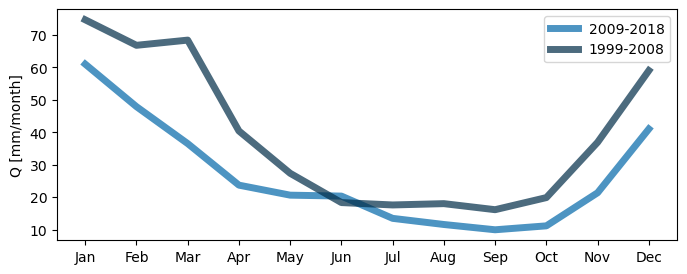

In [21]:
plt.figure(figsize=(8, 3)) # breedte = 10, hoogte = 5

labels= ["2009-2018","1999-2008"]

for k in range(2):
    runsnrv = runsnrvAB[w]
    Qv = QvAB[w]
    Qmmv = QmmvAB[w]
    EAv = EAvAB[w]
    sc = AB[w]
    colorv = colorAB[w]
    runsnr = runsnrv[k]
    Qmm = Qmmv[k]
    color = colorv[k]
    Qmm_m_perc = pd.DataFrame()
    Qmm_m = Qmm.groupby(Qmm.index.month).sum()/10
    run_0 = Qmm_m[f'run 0 ID 16']
    Qmm_m.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    time = Qmm_m.index
    plt.plot(time, run_0, '-', linewidth = '5', color=colors[k+1], label=labels[k], alpha=0.7)
    plt.ylabel('Q [mm/month]')
    plt.legend()
    

    plt.savefig(f'1_Output/{output}/Month/Q_Borgharen.pdf')  
    # plt.close()

# Flow over the year (change Q en Ea)

## Percentage change year basis Q (allemaal apart)

In [22]:
for w in range(2):
    runsnrv = runsnrvAB[w]
    Qv = QvAB[w]
    Qmmv = QmmvAB[w]
    EAv = EAvAB[w]
    sc = AB[w]
    colorv = colorAB[w]
    for u in range(len(meuse_id)):
        fig, axs = plt.subplots(2, 1, figsize=(10, 10))
        for k in range(2):
            ax2 = axs[k].twinx()
            runsnr = runsnrv[k]
            Qmm = Qmmv[k]
            color = colorv[k]
            Qmm_m_perc = pd.DataFrame()
            Qmm_m = Qmm.groupby(Qmm.index.month).mean()
            Qmm_m.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
            run_0 = Qmm_m[f'run 0 ID {meuse_id[u]}']
            Qmm_m = Qmm_m.drop(f'run 0 ID {meuse_id[u]}', axis=1)
            for i in runsnr:
                if i > 0:
                    time = Qmm_m.index
                    run = Qmm_m[f'run {i} ID {meuse_id[u]}']
                    run_diff = (run - run_0)
                    run_perc = (run_diff/run_0)*100
                    axs[k].plot(time, run_perc, '-', linewidth = '0', color=plt.cm.viridis_r(i / len(runsnr)))
                    ax2.plot(time, run_diff, '-', linewidth = '0', color=plt.cm.viridis_r(i / len(runsnr)))
                    Qmm_m_perc[f"run {i}"] = run_perc


            p10_perc = Qmm_m_perc.quantile(0.1, axis=1)
            p25_perc = Qmm_m_perc.quantile(0.25, axis=1)
            p50_perc = Qmm_m_perc.quantile(0.50, axis=1)
            p75_perc = Qmm_m_perc.quantile(0.75, axis=1)
            p90_perc = Qmm_m_perc.quantile(0.9, axis=1)

            Qmm_m_perc["10th_percentile"] = p10_perc
            Qmm_m_perc["25th_percentile"] = p25_perc
            Qmm_m_perc["50th_percentile"] = p50_perc
            Qmm_m_perc["75th_percentile"] = p75_perc
            Qmm_m_perc["90th_percentile"] = p90_perc

            axs[k].fill_between(time, Qmm_m_perc["10th_percentile"], Qmm_m_perc["90th_percentile"], color=color, alpha=0.1, label='10th-90th percentiles') 
            axs[k].fill_between(time, Qmm_m_perc["25th_percentile"], Qmm_m_perc["75th_percentile"], color=color, alpha=0.3, label='25th-75th percentiles') 
            axs[k].plot(time, p50_perc, '-', label=f'median', linewidth = '1', color='k')            
            axs[k].legend()
            axs[k].set_xlabel("Time")
            ax2.set_ylabel("Change in Q [mm/d]")
            axs[k].set_ylabel("Change in Q [%]")
            axs[k].axhline(y=0, color='grey', linestyle='--')
            ymax = max(abs(plt.ylim()[0]), abs(plt.ylim()[1]))
            axs[k].set_title(f"Percentage change Q at station {meuse_id[u]} prediction scenario {k+1}, {sc}")

        plt.savefig(f'1_Output/{output}/Month_Q/Q_mm_d_perc_mmd{meuse_id[u]}_{sc}.pdf')  
        plt.close()

## Percentage change year basis Q (samen)

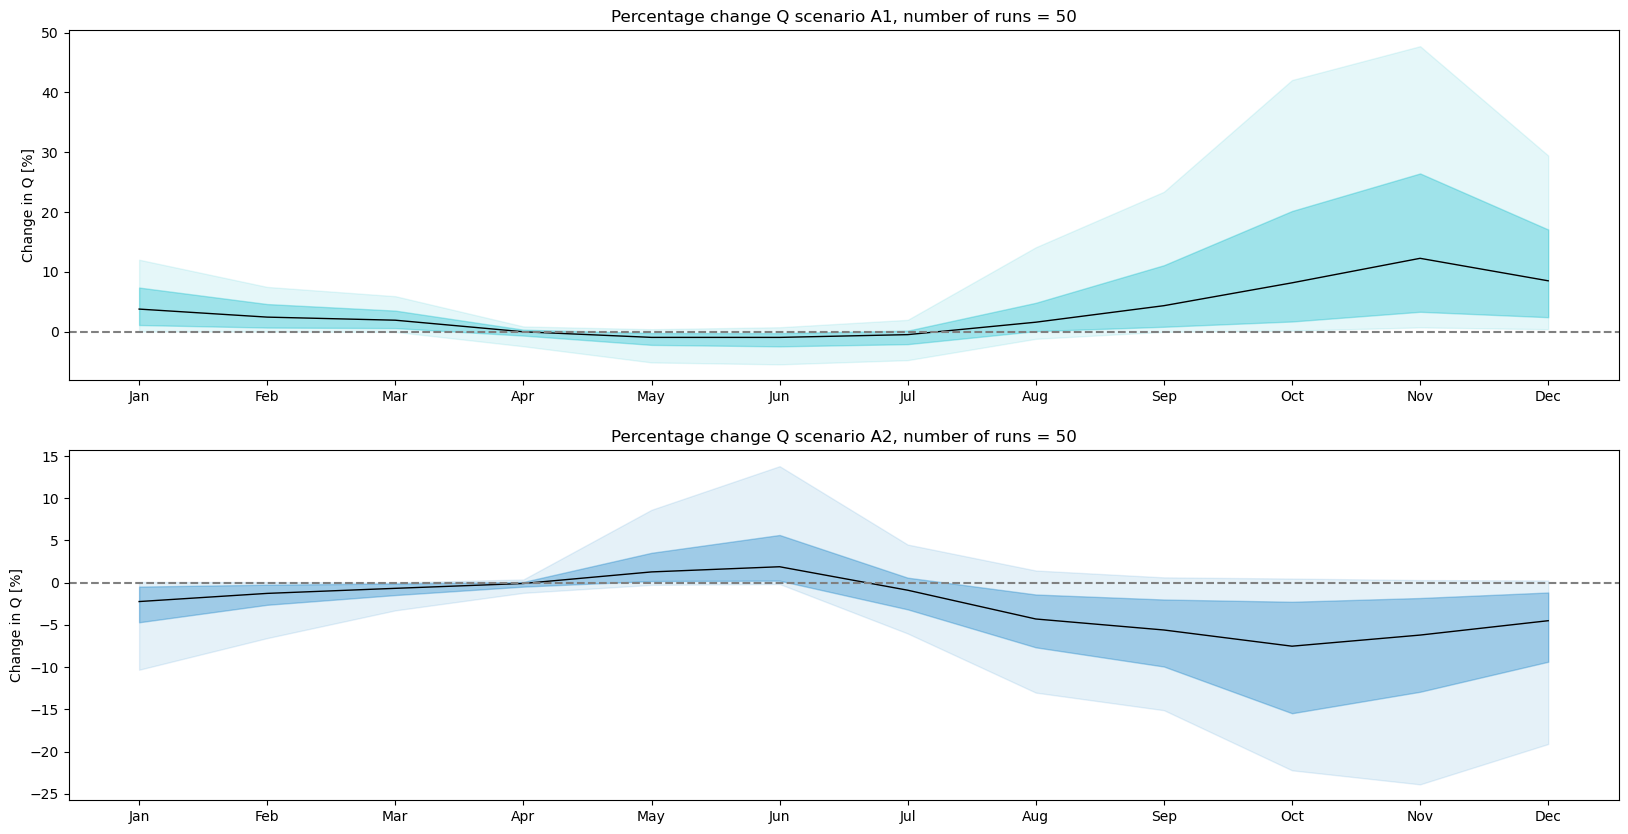

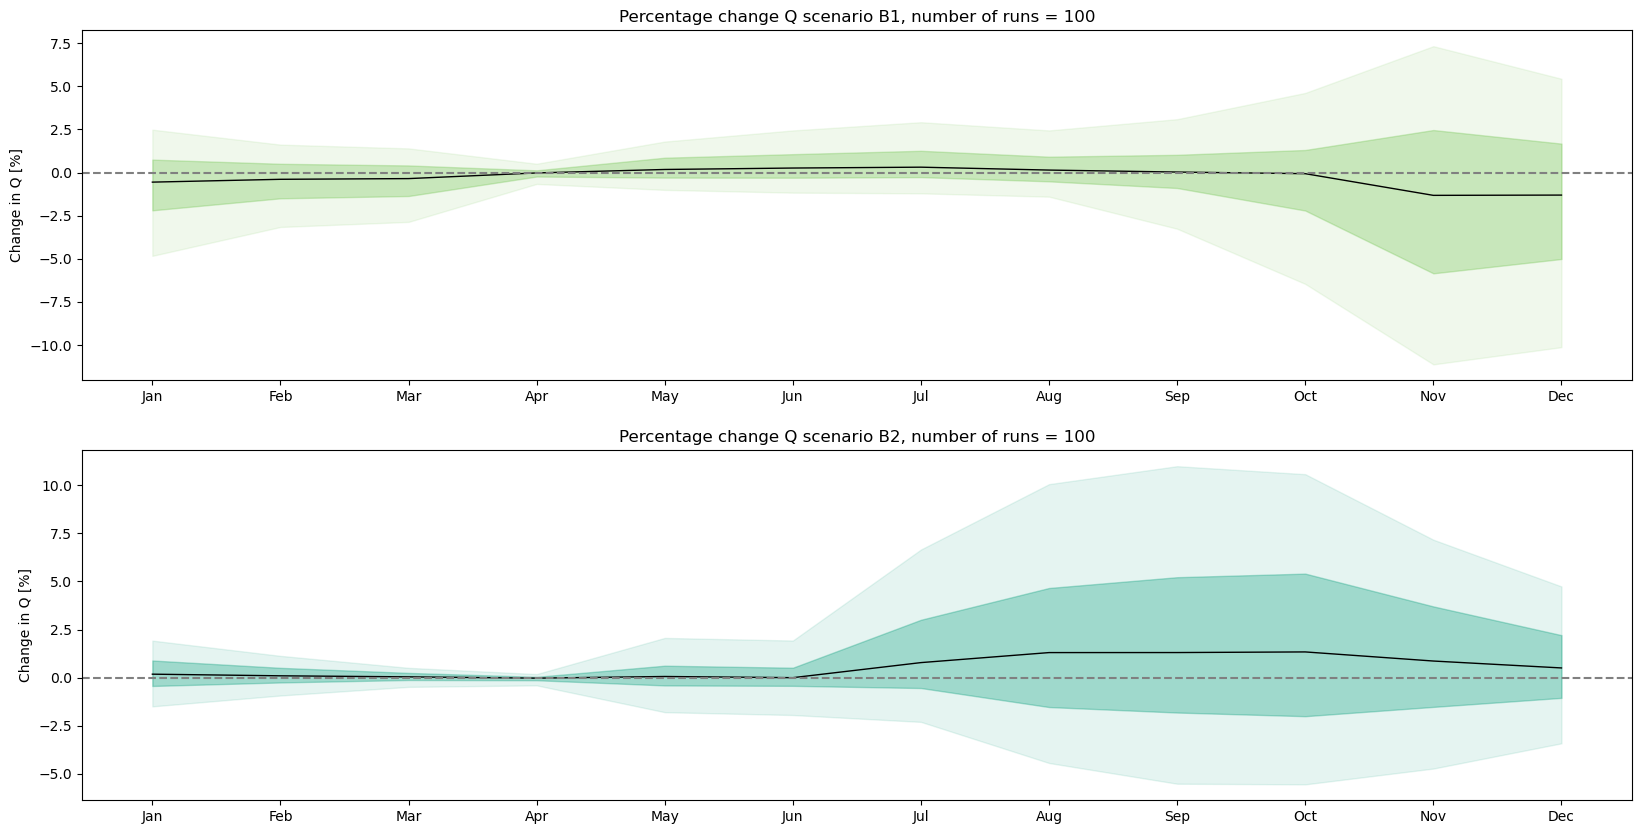

In [23]:
for w in range(2):
    runsnrv = runsnrvAB[w]
    Qv = QvAB[w]
    Qmmv = QmmvAB[w]
    EAv = EAvAB[w]
    sc = AB[w]
    colorv = colorAB[w]
    fig, axs = plt.subplots(2, 1, figsize=(20, 10))

    for k in range(2):
        runsnr = runsnrv[k]
        Qmm = Qmmv[k]
        color=colorv[k]
        Qmm_m_perc = pd.DataFrame()
        Qmm_m = Qmm.groupby(Qmm.index.month).mean()
        Qmm_m.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

        for u in range(len(meuse_id)):
            run_0 = Qmm_m[f'run 0 ID {meuse_id[u]}']
            Qmm_m = Qmm_m.drop(f'run 0 ID {meuse_id[u]}', axis=1)
            for i in runsnr:
                if i > 0:
                    time = Qmm_m.index
                    run = Qmm_m[f'run {i} ID {meuse_id[u]}']
                    run_perc = (run - run_0)/run_0 * 100
                    Qmm_m_perc[f"run {i} ID {meuse_id[u]}"] = run_perc

        p10_perc = Qmm_m_perc.quantile(0.1, axis=1)
        p25_perc = Qmm_m_perc.quantile(0.25, axis=1)
        p50_perc = Qmm_m_perc.quantile(0.50, axis=1)
        p75_perc = Qmm_m_perc.quantile(0.75, axis=1)
        p90_perc = Qmm_m_perc.quantile(0.9, axis=1)

        Qmm_m_perc["10th_percentile"] = p10_perc
        Qmm_m_perc["25th_percentile"] = p25_perc
        Qmm_m_perc["50th_percentile"] = p50_perc
        Qmm_m_perc["75th_percentile"] = p75_perc
        Qmm_m_perc["90th_percentile"] = p90_perc

        axs[k].fill_between(time, Qmm_m_perc["10th_percentile"], Qmm_m_perc["90th_percentile"], color=color, alpha=0.1, label='10th-90th percentiles') 
        axs[k].fill_between(time, Qmm_m_perc["25th_percentile"], Qmm_m_perc["75th_percentile"], color=color, alpha=0.3, label='25th-75th percentiles') 
        axs[k].plot(time, p50_perc, '-', label=f'median', linewidth = '1', color='k')
        axs[k].set_ylabel("Change in Q [%]")
        axs[k].axhline(y=0, color='grey', linestyle='--')
        ymax = max(abs(plt.ylim()[0]), abs(plt.ylim()[1]))
        axs[k].set_title(f"Percentage change Q scenario {sc}{k+1}, number of runs = {len(runsnr)-1}")

    plt.savefig(f'1_Output/{output}/Q_mm_d_perc_together_{sc}.png')  

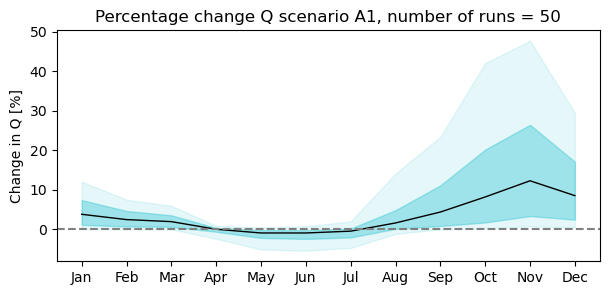

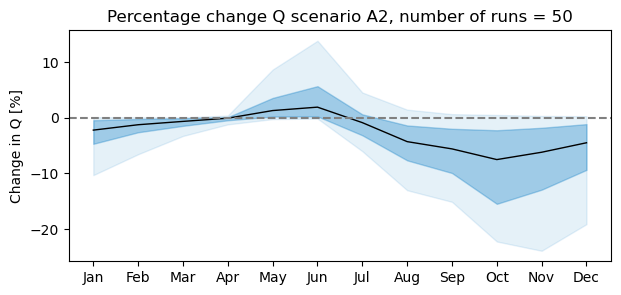

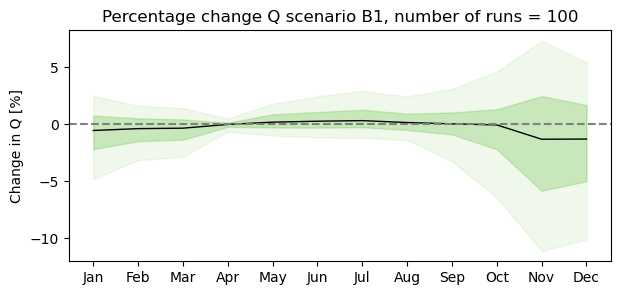

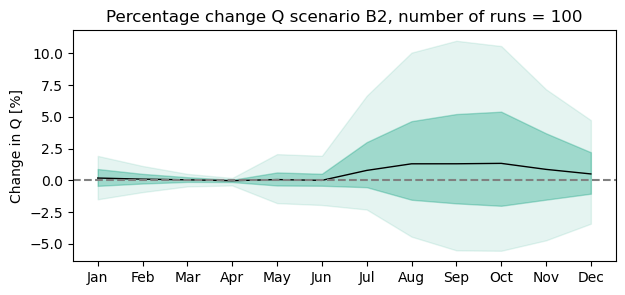

In [24]:
for w in range(2):
    runsnrv = runsnrvAB[w]
    Qv = QvAB[w]
    Qmmv = QmmvAB[w]
    EAv = EAvAB[w]
    sc = AB[w]
    colorv = colorAB[w]
    for k in range(2):
        fig, axs = plt.subplots(1, 1, figsize=(7,3))
        runsnr = runsnrv[k]
        Qmm = Qmmv[k]
        color=colorv[k]
        Qmm_m_perc = pd.DataFrame()
        Qmm_m = Qmm.groupby(Qmm.index.month).mean()
        Qmm_m.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        for u in range(len(meuse_id)):
            run_0 = Qmm_m[f'run 0 ID {meuse_id[u]}']
            Qmm_m = Qmm_m.drop(f'run 0 ID {meuse_id[u]}', axis=1)
            for i in runsnr:
                if i > 0:
                    time = Qmm_m.index
                    run = Qmm_m[f'run {i} ID {meuse_id[u]}']
                    run_perc = (run - run_0)/run_0 * 100
                    Qmm_m_perc[f"run {i} ID {meuse_id[u]}"] = run_perc

        p10_perc = Qmm_m_perc.quantile(0.1, axis=1)
        p25_perc = Qmm_m_perc.quantile(0.25, axis=1)
        p50_perc = Qmm_m_perc.quantile(0.50, axis=1)
        p75_perc = Qmm_m_perc.quantile(0.75, axis=1)
        p90_perc = Qmm_m_perc.quantile(0.9, axis=1)

        Qmm_m_perc["10th_percentile"] = p10_perc
        Qmm_m_perc["25th_percentile"] = p25_perc
        Qmm_m_perc["50th_percentile"] = p50_perc
        Qmm_m_perc["75th_percentile"] = p75_perc
        Qmm_m_perc["90th_percentile"] = p90_perc

        axs.fill_between(time, Qmm_m_perc["10th_percentile"], Qmm_m_perc["90th_percentile"], color=color, alpha=0.1, label='10th-90th percentiles') 
        axs.fill_between(time, Qmm_m_perc["25th_percentile"], Qmm_m_perc["75th_percentile"], color=color, alpha=0.3, label='25th-75th percentiles') 
        axs.plot(time, p50_perc, '-', label=f'median', linewidth = '1', color='k')



            # if k>0:
        # axs[k].legend(loc='upper left')
        # axs[k].set_xlabel("Time")
        axs.set_ylabel("Change in Q [%]")
        axs.axhline(y=0, color='grey', linestyle='--')
        ymax = max(abs(plt.ylim()[0]), abs(plt.ylim()[1]))
        axs.set_title(f"Percentage change Q scenario {sc}{k+1}, number of runs = {len(runsnr)-1}")

        plt.savefig(f'1_Output/{output}/Q_mm_d_perc_together_{k+1}{sc}.pdf')  

## Percentage change year basis EA (allemaal apart)

In [25]:
for w in range(2):
    runsnrv = runsnrvAB[w]
    Qv = QvAB[w]
    Qmmv = QmmvAB[w]
    EAv = EAvAB[w]
    sc = AB[w]
    colorv = colorAB[w]
    for u in range(len(meuse_id)):
        fig, axs = plt.subplots(2, 1, figsize=(20, 10))
        for k in range(2):
            EA_m_perc = pd.DataFrame()
            ax2 = axs[k].twinx()
            runsnr = runsnrv[k]
            EA = EAv[k]
            color = colorv[k]
            EA_m = EA.groupby(EA.index.month).mean()
            EA_m.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
            run_0 = EA_m[f'run 0 ID {meuse_id[u]}']
            EA_m = EA_m.drop(f'run 0 ID {meuse_id[u]}', axis=1)
            for i in runsnr:
                if i > 0:
                    time = EA_m.index
                    run = EA_m[f'run {i} ID {meuse_id[u]}']
                    run_diff = (run - run_0)
                    run_perc = (run_diff/run_0)*100
                    axs[k].plot(time, run_perc, '-', linewidth = '1', color=plt.cm.viridis_r(i / len(runsnr)))
                    ax2.plot(time, run_diff, '-', linewidth = '0', color=plt.cm.viridis_r(i / len(runsnr)))
                    EA_m_perc[f"run {i}"] = run_perc

            p10_perc = EA_m_perc.quantile(0.1, axis=1)
            p25_perc = EA_m_perc.quantile(0.25, axis=1)
            p50_perc = EA_m_perc.quantile(0.5, axis=1)
            p75_perc = EA_m_perc.quantile(0.75, axis=1)
            p90_perc = EA_m_perc.quantile(0.9, axis=1)

            EA_m_perc["10th_percentile"] = p10_perc
            EA_m_perc["25th_percentile"] = p25_perc
            EA_m_perc["50th_percentile"] = p50_perc
            EA_m_perc["75th_percentile"] = p75_perc
            EA_m_perc["90th_percentile"] = p90_perc

            axs[k].fill_between(time, EA_m_perc["10th_percentile"], EA_m_perc["90th_percentile"], color=color, alpha=0.1, label='10th-90th percentiles') 
            axs[k].fill_between(time, EA_m_perc["25th_percentile"], EA_m_perc["75th_percentile"], color=color, alpha=0.3, label='25th-75th percentiles')              
            axs[k].plot(time, p50_perc, '-', label=f'median', linewidth = '1', color='k')    

            axs[k].legend()
            axs[k].set_xlabel("Time")
            ax2.set_ylabel("Change in EA [mm/d]")
            axs[k].set_ylabel("Change in EA [%]")
            axs[k].axhline(y=0, color='grey', linestyle='--')
            ymax = max(abs(plt.ylim()[0]), abs(plt.ylim()[1]))
            axs[k].set_title(f"Percentage change EA at station {meuse_id[u]} prediction scenario {k+1}, {sc}")

        plt.savefig(f'1_Output/{output}/Month_EA/EA_mm_d_perc_{meuse_id[u]}_{sc}.png')  
        plt.close()

## Percentage change year basis EA (samen)

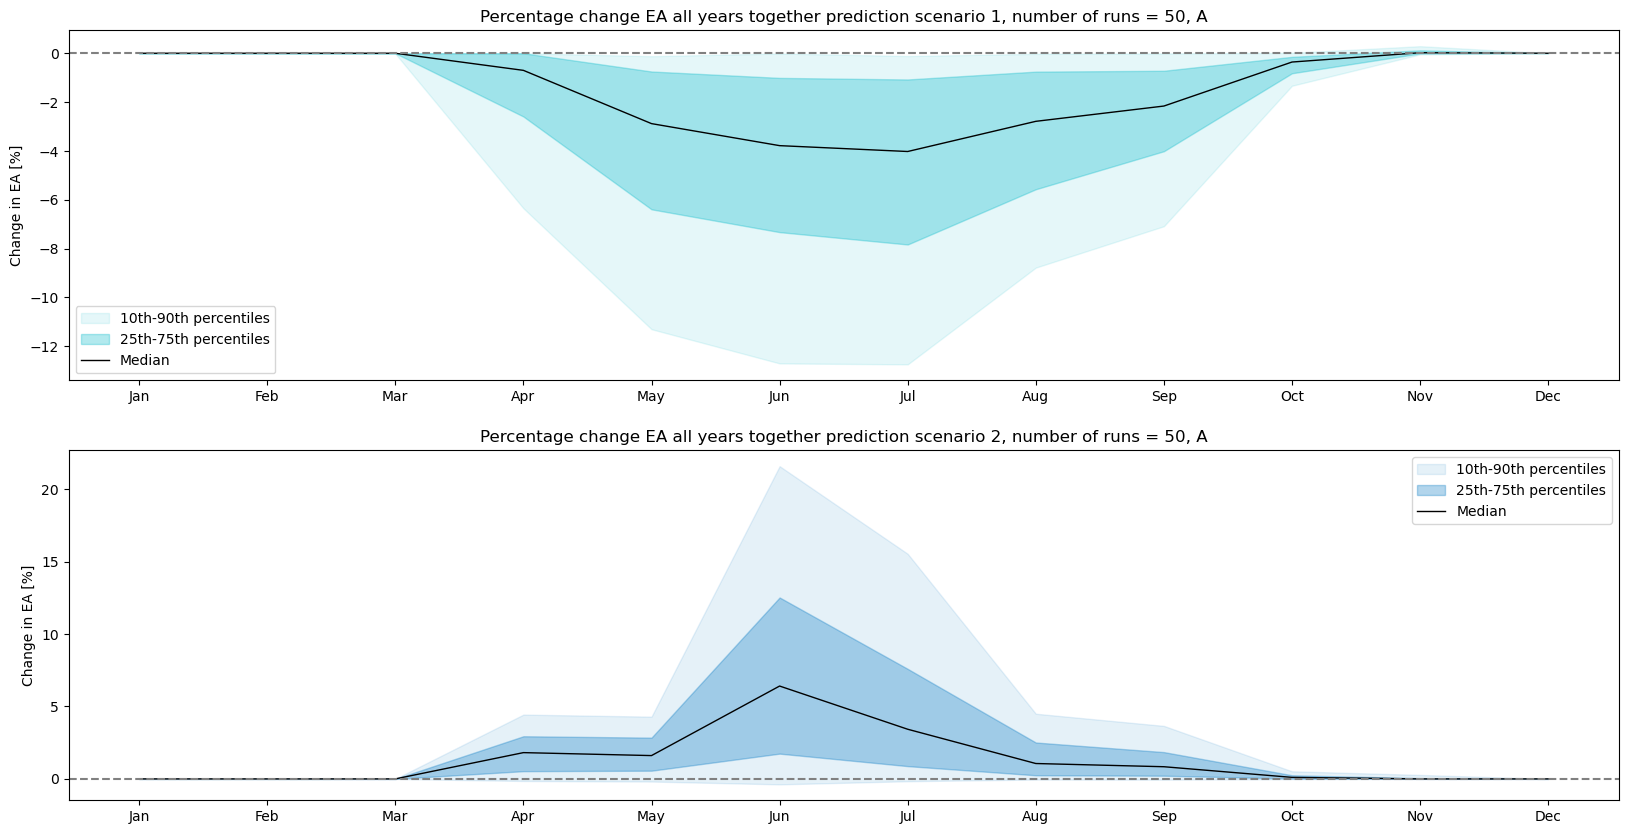

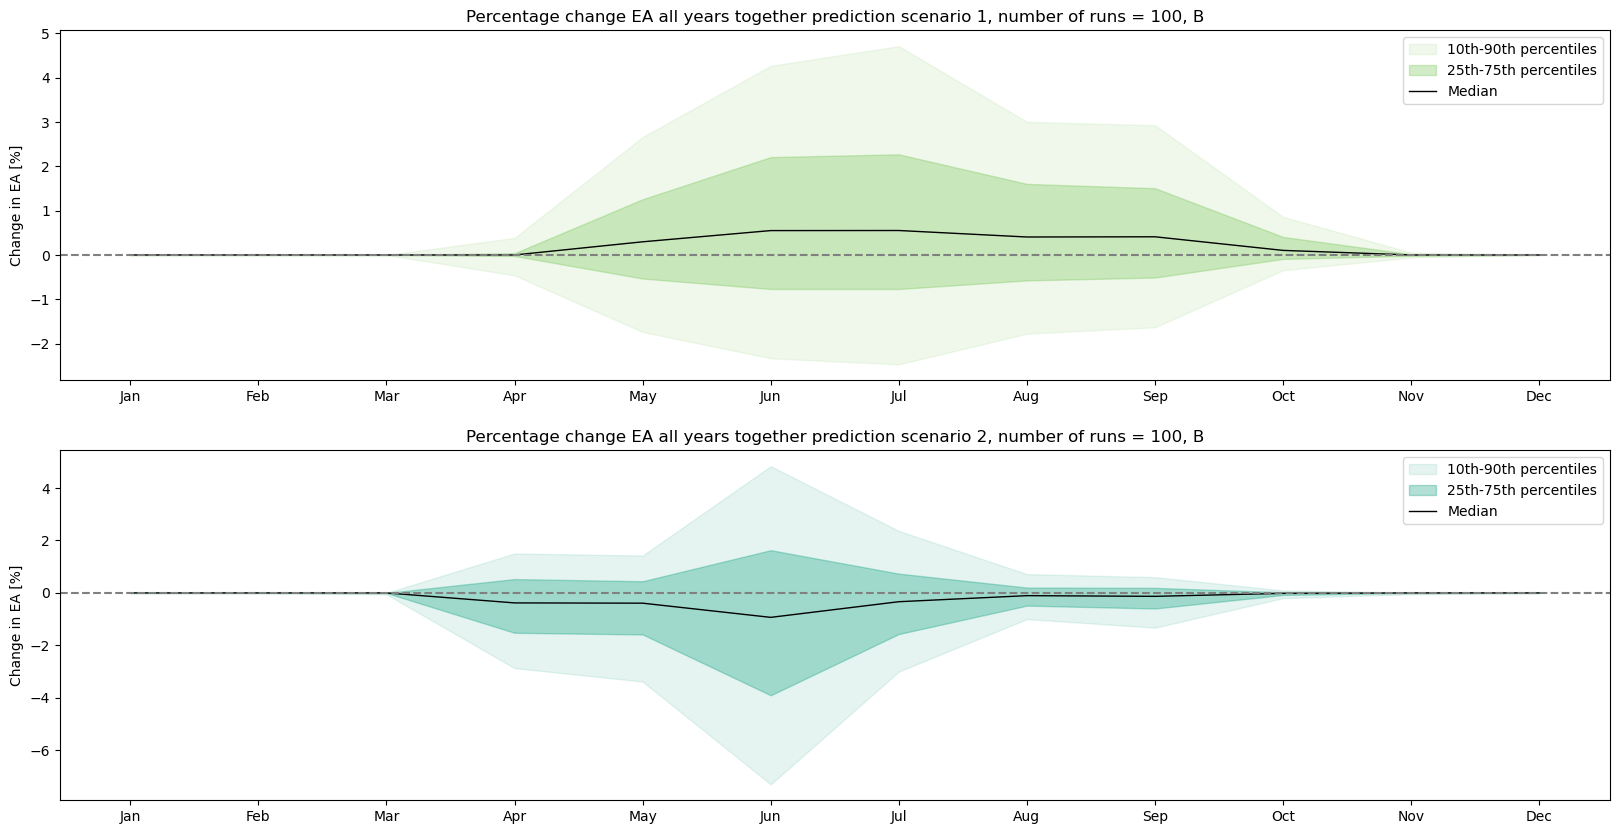

In [26]:
for w in range(2):
    runsnrv = runsnrvAB[w]
    Qv = QvAB[w]
    Qmmv = QmmvAB[w]
    EAv = EAvAB[w]
    sc = AB[w]
    colorv = colorAB[w]

    fig, axs = plt.subplots(2, 1, figsize=(20,10))
    
    
    for k in range(2):
        
        EA_m_perc = pd.DataFrame()
        for u in range(len(meuse_id)):
            runsnr = runsnrv[k]
            EA = EAv[k]
            color = colorv[k]
            EA_m = EA.groupby(EA.index.month).mean()
            EA_m.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
            run_0 = EA_m[f'run 0 ID {meuse_id[u]}']
            EA_m = EA_m.drop(f'run 0 ID {meuse_id[u]}', axis=1)
            for i in runsnr:
                if i > 0:
                    time = EA_m.index
                    run = EA_m[f'run {i} ID {meuse_id[u]}']
                    run_perc = (run - run_0)/run_0 * 100
                    # axs[k].plot(time, run_perc, '-', label=f'run {i}, scenario {k+1}', linewidth = '1', color=plt.cm.viridis_r(u / len(meuse_id)))
                    EA_m_perc[f"run {i} ID {meuse_id[u]}"] = run_perc

        p10_perc = EA_m_perc.quantile(0.1, axis=1)
        p25_perc = EA_m_perc.quantile(0.25, axis=1)
        p50_perc = EA_m_perc.quantile(0.50, axis=1)
        p75_perc = EA_m_perc.quantile(0.75, axis=1)
        p90_perc = EA_m_perc.quantile(0.9, axis=1)

        EA_m_perc["10th_percentile"] = p10_perc
        EA_m_perc["25th_percentile"] = p25_perc
        EA_m_perc["50th_percentile"] = p50_perc
        EA_m_perc["75th_percentile"] = p75_perc
        EA_m_perc["90th_percentile"] = p90_perc

        axs[k].fill_between(time, EA_m_perc["10th_percentile"], EA_m_perc["90th_percentile"], color=color, alpha=0.1, label='10th-90th percentiles') 
        axs[k].fill_between(time, EA_m_perc["25th_percentile"], EA_m_perc["75th_percentile"], color=color, alpha=0.3, label='25th-75th percentiles') 
        axs[k].plot(time, p50_perc, '-', label=f'Median', linewidth = '1', color='k')



            # if k>0:
        axs[k].legend()
        # axs[k].set_xlabel("Time")
        axs[k].set_ylabel("Change in EA [%]")
        axs[k].axhline(y=0, color='grey', linestyle='--')
        ymax = max(abs(plt.ylim()[0]), abs(plt.ylim()[1]))
        axs[k].set_title(f"Percentage change EA all years together prediction scenario {k+1}, number of runs = {len(runsnr)-1}, {sc}")

    plt.savefig(f'1_Output/{output}/EA_mm_d_perc_together_{sc}.png')  

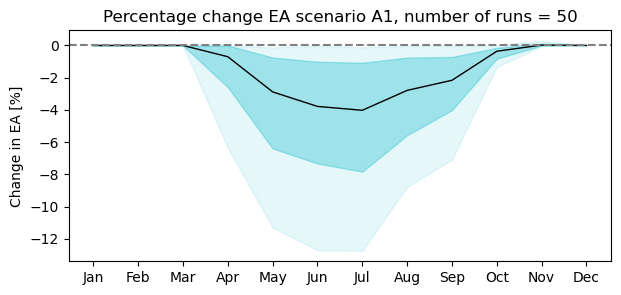

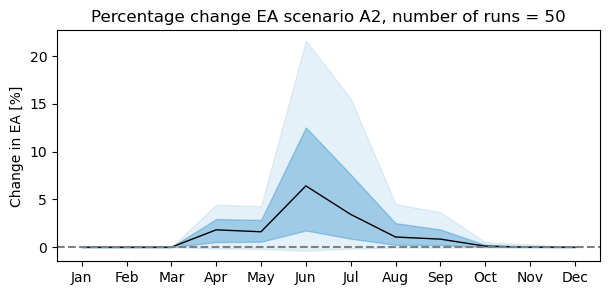

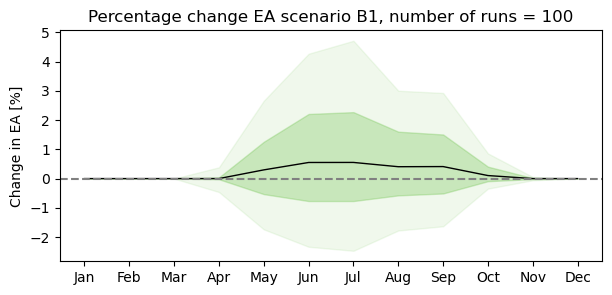

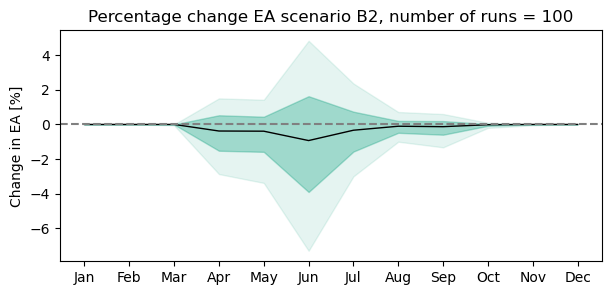

In [27]:
for w in range(2):
    runsnrv = runsnrvAB[w]
    Qv = QvAB[w]
    Qmmv = QmmvAB[w]
    EAv = EAvAB[w]
    sc = AB[w]
    colorv = colorAB[w]
    

    for k in range(2):
        fig, axs = plt.subplots(1, 1, figsize=(7,3))
        EA_m_perc = pd.DataFrame()
        for u in range(len(meuse_id)):
            runsnr = runsnrv[k]
            EA = EAv[k]
            color = colorv[k]
            EA_m = EA.groupby(EA.index.month).mean()
            EA_m.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
            run_0 = EA_m[f'run 0 ID {meuse_id[u]}']
            EA_m = EA_m.drop(f'run 0 ID {meuse_id[u]}', axis=1)
            for i in runsnr:
                if i > 0:
                    time = EA_m.index
                    run = EA_m[f'run {i} ID {meuse_id[u]}']
                    run_perc = (run - run_0)/run_0 * 100
                    # axs[k].plot(time, run_perc, '-', label=f'run {i}, scenario {k+1}', linewidth = '1', color=plt.cm.viridis_r(u / len(meuse_id)))
                    EA_m_perc[f"run {i} ID {meuse_id[u]}"] = run_perc

        p10_perc = EA_m_perc.quantile(0.1, axis=1)
        p25_perc = EA_m_perc.quantile(0.25, axis=1)
        p50_perc = EA_m_perc.quantile(0.50, axis=1)
        p75_perc = EA_m_perc.quantile(0.75, axis=1)
        p90_perc = EA_m_perc.quantile(0.9, axis=1)

        EA_m_perc["10th_percentile"] = p10_perc
        EA_m_perc["25th_percentile"] = p25_perc
        EA_m_perc["50th_percentile"] = p50_perc
        EA_m_perc["75th_percentile"] = p75_perc
        EA_m_perc["90th_percentile"] = p90_perc

        axs.fill_between(time, EA_m_perc["10th_percentile"], EA_m_perc["90th_percentile"], color=color, alpha=0.1, label='10th-90th percentiles') 
        axs.fill_between(time, EA_m_perc["25th_percentile"], EA_m_perc["75th_percentile"], color=color, alpha=0.3, label='25th-75th percentiles') 
        axs.plot(time, p50_perc, '-', label=f'Median', linewidth = '1', color='k')



            # if k>0:
        # axs.legend()
        # axs[k].set_xlabel("Time")
        axs.set_ylabel("Change in EA [%]")
        axs.axhline(y=0, color='grey', linestyle='--')
        ymax = max(abs(plt.ylim()[0]), abs(plt.ylim()[1]))
        axs.set_title(f"Percentage change EA scenario {sc}{k+1}, number of runs = {len(runsnr)-1}")

        plt.savefig(f'1_Output/{output}/EA_mm_d_perc_together_{sc}{k+1}.pdf')  

## 1 plot per catchment met verandering in stroming

In [58]:
ticklabels = ['J', 'F', 'M', 'A', 'M', 'J','J', 'A', 'S', 'O', 'N', 'D']

for u in range(len(meuse_id)):
    ylim_max = 0
    ylim_min = 0
    fig, axs = plt.subplots(2, 4, figsize=(14, 6))
    fig.subplots_adjust(wspace=0.01, hspace=0.3, left=0.05, right=0.98)
    for w in range(2):
        runsnrv = runsnrvAB[w]
        Qv = QvAB[w]
        Qmmv = QmmvAB[w]
        EAv = EAvAB[w]
        sc = AB[w]
        colorv = colorAB[w]
        
        for k in range(2):
            if w == 0 and k == 0:
                m = 0
            elif w == 0 and k == 1:
                m = 1
            elif w == 1 and k == 0:
                m = 2
            elif w == 1 and k == 1:
                m = 3 
            EA_m_perc = pd.DataFrame()
            runsnr = runsnrv[k]
            EA = EAv[k]
            color = colorv[k]
            EA_m = EA.groupby(EA.index.month).mean()
            EA_m.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
            run_0 = EA_m[f'run 0 ID {meuse_id[u]}']
            EA_m = EA_m.drop(f'run 0 ID {meuse_id[u]}', axis=1)
            for i in runsnr:
                if i > 0:
                    time = EA_m.index
                    run = EA_m[f'run {i} ID {meuse_id[u]}']
                    run_diff = (run - run_0)
                    EA_m_perc[f"run {i}"] = run_diff

            p10_perc = EA_m_perc.quantile(0.1, axis=1)
            p25_perc = EA_m_perc.quantile(0.25, axis=1)
            p50_perc = EA_m_perc.quantile(0.5, axis=1)
            p75_perc = EA_m_perc.quantile(0.75, axis=1)
            p90_perc = EA_m_perc.quantile(0.9, axis=1)

            EA_m_perc["10th_percentile"] = p10_perc
            EA_m_perc["25th_percentile"] = p25_perc
            EA_m_perc["50th_percentile"] = p50_perc
            EA_m_perc["75th_percentile"] = p75_perc
            EA_m_perc["90th_percentile"] = p90_perc

            axs[0,m].fill_between(time, EA_m_perc["10th_percentile"], EA_m_perc["90th_percentile"], color=color, alpha=0.1, label='10th-90th percentiles') 
            axs[0,m].fill_between(time, EA_m_perc["25th_percentile"], EA_m_perc["75th_percentile"], color=color, alpha=0.3, label='25th-75th percentiles')              
            axs[0,m].plot(time, p50_perc, '-', label=f'median', linewidth = '1', color='k')    
            axs[0,m].set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

            
            maximum = max(p90_perc)
            minimum = min(p10_perc)
            
            if maximum > ylim_max:
                ylim_max = maximum*1.1
            if minimum < ylim_min:
                ylim_min = minimum*1.1
            
            
            axs[0,m].axhline(y=0, color='grey', linestyle='--')
            axs[0,m].set_title(f"Scenario {k+1}{sc}")
            
            if m ==0:
                axs[0,m].set_ylabel("Change in EA [mm/d]")
            
    for c in range(4):
        axs[0, c].set_ylim(ylim_min, ylim_max)
        if c > 0:
            axs[0, c].set_xlabel('')
            axs[0, c].set_ylabel('')
            axs[0, c].set_yticklabels([])

    ylim_max = 0
    ylim_min = 0 
    for w in range(2):
        runsnrv = runsnrvAB[w]
        Qv = QvAB[w]
        Qmmv = QmmvAB[w]
        EAv = EAvAB[w]
        sc = AB[w]
        colorv = colorAB[w]
        for k in range(2):
            if w == 0 and k == 0:
                m = 0
            elif w == 0 and k == 1:
                m = 1
            elif w == 1 and k == 0:
                m = 2
            elif w == 1 and k == 1:
                m = 3 
            runsnr = runsnrv[k]
            Qmm = Qmmv[k]
            color = colorv[k]
            Qmm_m_perc = pd.DataFrame()
            Qextra = pd.DataFrame()
            Qmm_m = Qmm.groupby(Qmm.index.month).mean()
            Qmm_m.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
            run_0 = Qmm_m[f'run 0 ID {meuse_id[u]}']
            Qmm_m = Qmm_m.drop(f'run 0 ID {meuse_id[u]}', axis=1)
            for i in runsnr:
                if i > 0:
                    time = Qmm_m.index
                    run = Qmm_m[f'run {i} ID {meuse_id[u]}']
                    run_diff = (run - run_0)
                    Qmm_m_perc[f"run {i}"] = run_diff

            p10_perc = Qmm_m_perc.quantile(0.1, axis=1)
            p25_perc = Qmm_m_perc.quantile(0.25, axis=1)
            p50_perc = Qmm_m_perc.quantile(0.50, axis=1)
            p75_perc = Qmm_m_perc.quantile(0.75, axis=1)
            p90_perc = Qmm_m_perc.quantile(0.9, axis=1)


            Qmm_m_perc["10th_percentile"] = p10_perc
            Qmm_m_perc["25th_percentile"] = p25_perc
            Qmm_m_perc["50th_percentile"] = p50_perc
            Qmm_m_perc["75th_percentile"] = p75_perc
            Qmm_m_perc["90th_percentile"] = p90_perc
            
            
            maximum = max(p90_perc)
            minimum = min(p10_perc)
            
            if maximum > ylim_max:
                ylim_max = maximum*1.1
            if minimum < ylim_min:
                ylim_min = minimum*1.1

            axs[1,m].fill_between(time, Qmm_m_perc["10th_percentile"], Qmm_m_perc["90th_percentile"], color=color, alpha=0.1, label='10th-90th percentiles') 
            axs[1,m].fill_between(time, Qmm_m_perc["25th_percentile"], Qmm_m_perc["75th_percentile"], color=color, alpha=0.3, label='25th-75th percentiles') 
            axs[1,m].plot(time, p50_perc, '-', label=f'median', linewidth = '1', color='k')   
            axs[1,m].set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])            
            axs[1,m].axhline(y=0, color='grey', linestyle='--')
            axs[1,m].set_title(f"Scenario {k+1}{sc}")

            
            if m ==0:
                axs[1,m].set_ylabel("Change in Q [mm/d]")                
            
        
    for c in range(4):
        axs[1, c].set_ylim(ylim_min, ylim_max)
        if c > 0:
            axs[1, c].set_xlabel('')
            axs[1, c].set_ylabel('')
            axs[1, c].set_yticklabels([])
            
    ID = meuse_id[u]
    name = (WFLOW_inv[str(ID)])

    fig.suptitle(f'Catchment {name}', fontsize = 14)
    plt.savefig(f'1_Output/{output}/Flow/Flow_{meuse_id[u]}.pdf')  
    plt.close()    

# Analysis of maxima

## Max annual Q

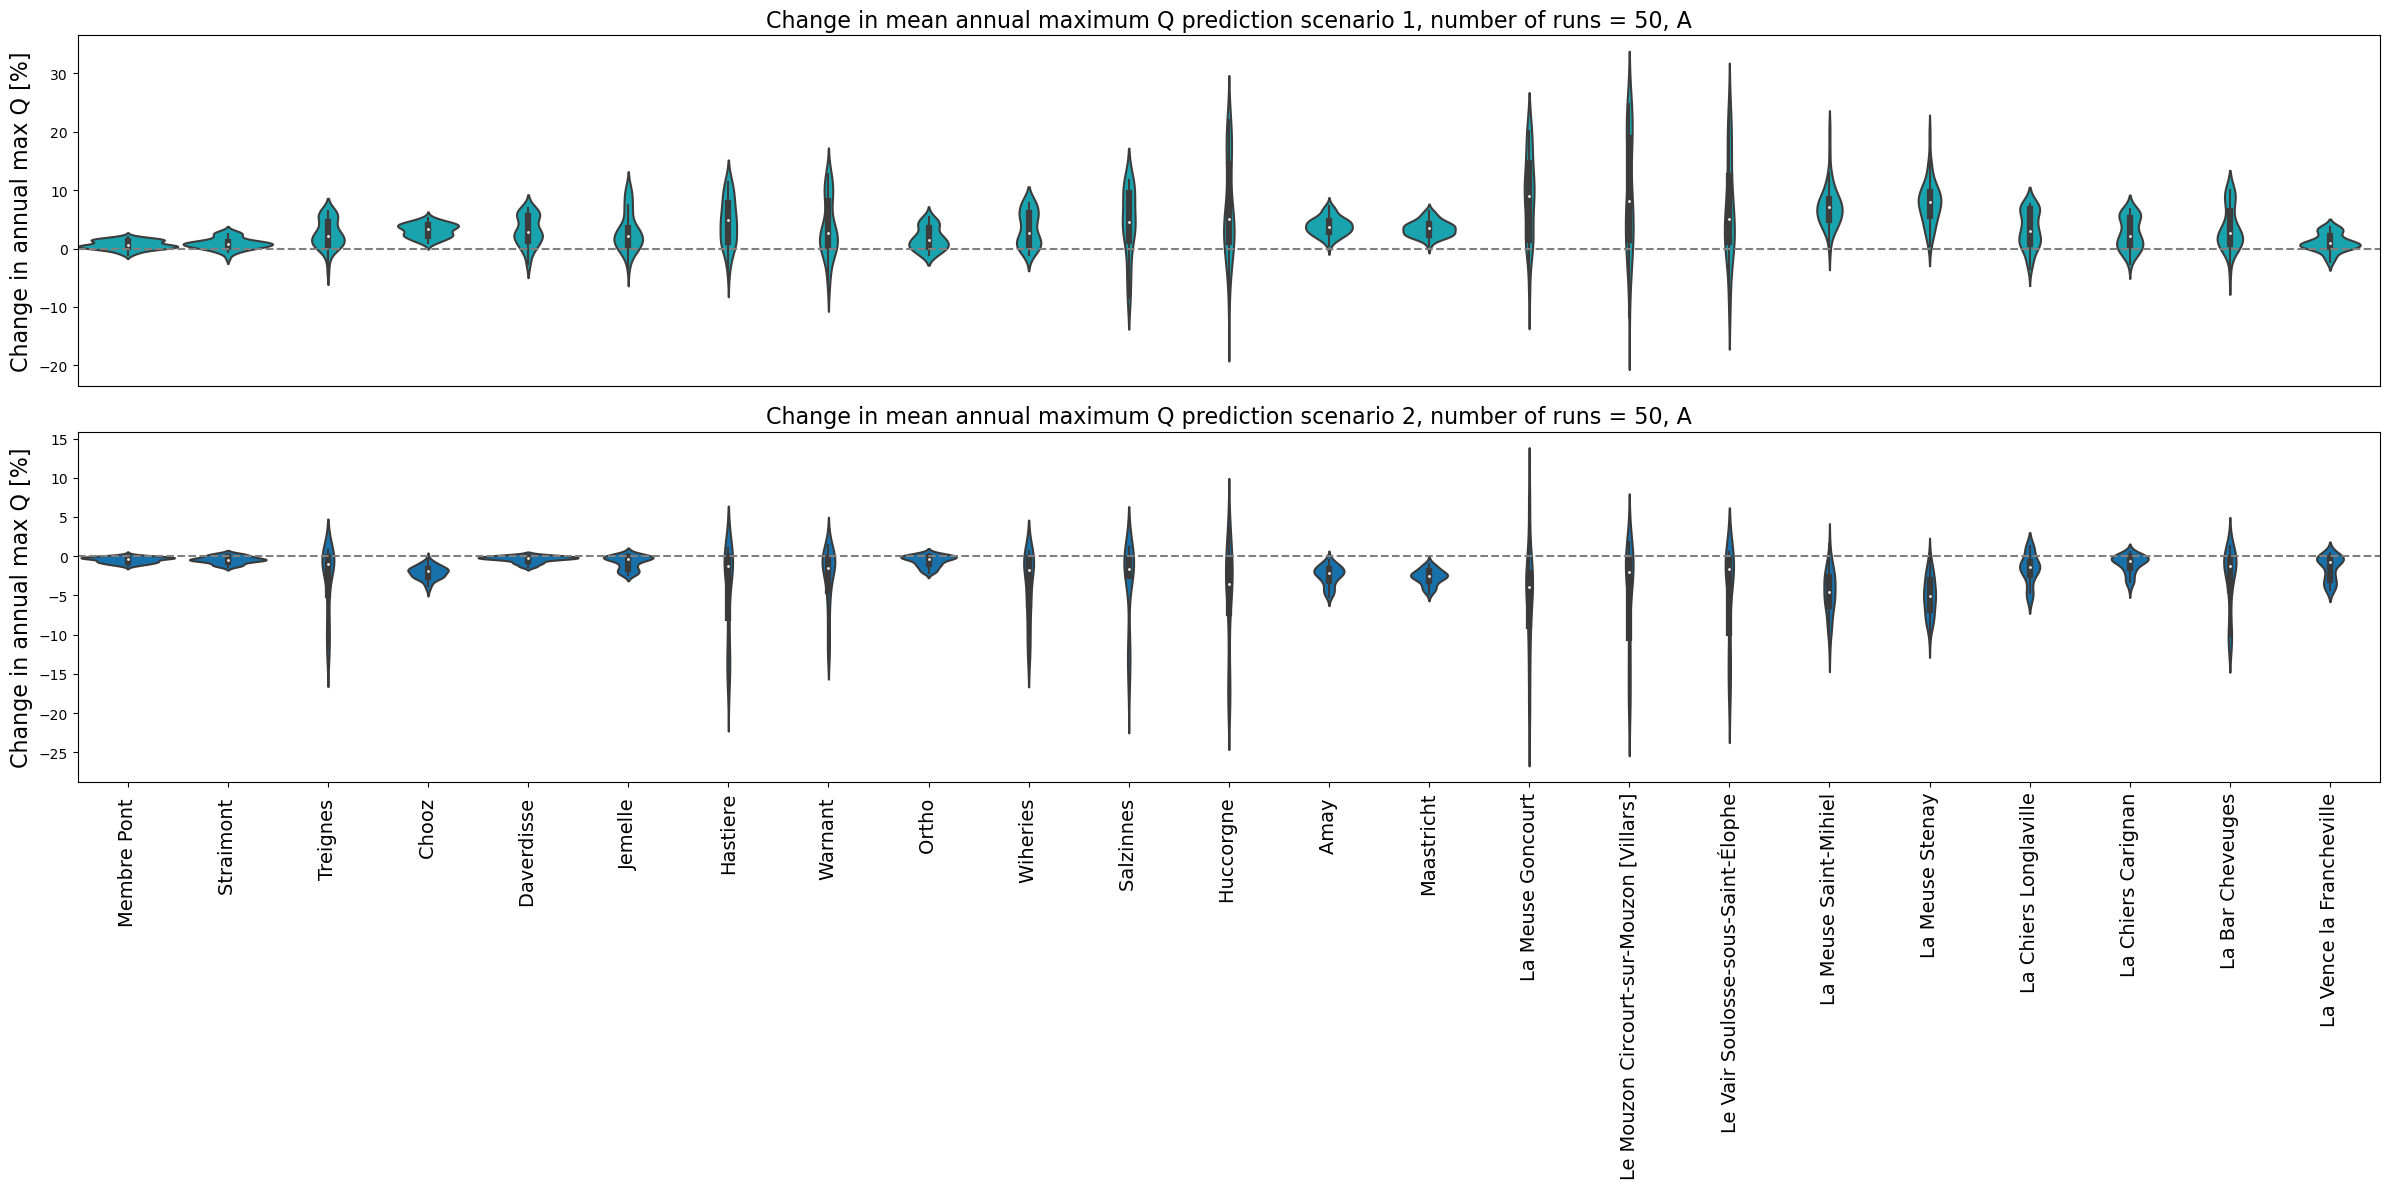

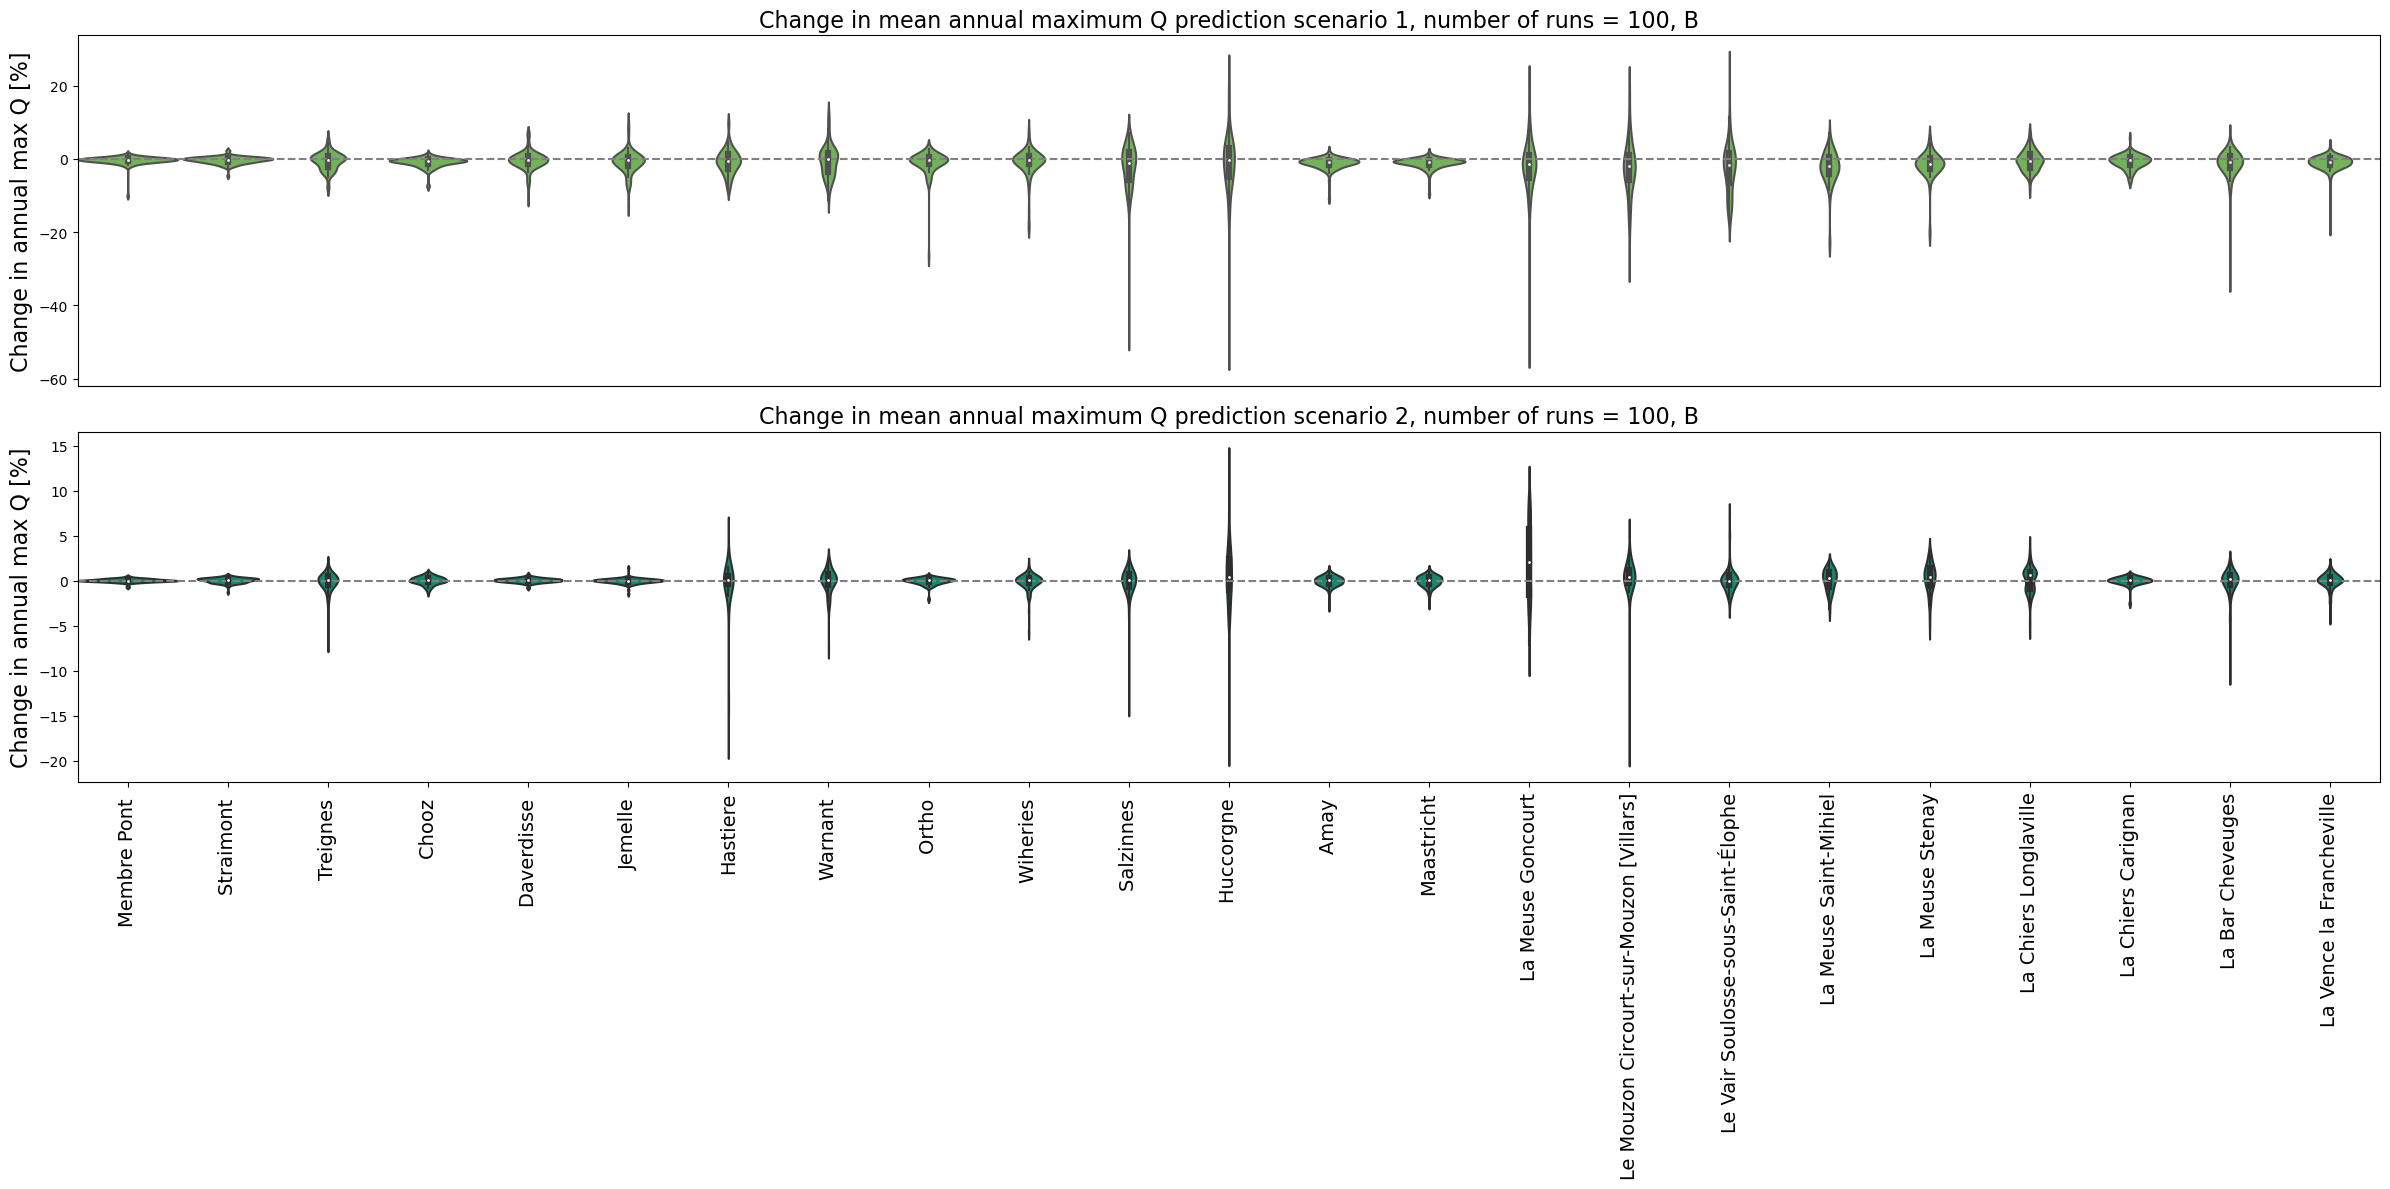

In [39]:
for w in range(2):
    runsnrv = runsnrvAB[w]
    Qv = QvAB[w]
    Qmmv = QmmvAB[w]
    EAv = EAvAB[w]
    sc = AB[w]
    colorv = colorAB[w]
    mean_annual_maxv = ["", ""]
    for k in range(2):
        runsnr = runsnrv[k]
        Q = Qv[k]
        mean_annual_max = pd.DataFrame()
        for i in runsnr:
            for u in range(len(meuse_id)):
                col_name = f'run {i} ID {meuse_id[u]}'
                annual_max = Q[col_name].resample('A').max() 
                mean_an_max = np.mean(annual_max)
                mean_annual_max.loc[f'run {i}', f'ID {meuse_id[u]}'] = mean_an_max
                mean_annual_maxv[k] = mean_annual_max

    fig, axs = plt.subplots(2, 1, figsize=(24, 12))
    for k in range(2):
        color = colorv[k]
        runsnr = runsnrv[k]
        mean_annual_max = mean_annual_maxv[k]
        mean_annual_perc = pd.DataFrame()
        mean_annual_diff = pd.DataFrame()
        for i in runsnr:
            for u in range(len(meuse_id)):
                mean_an0 = mean_annual_max.loc[f'run 0', f'ID {meuse_id[u]}']
                if i > 0:
                    mean_an = mean_annual_max.loc[f'run {i}', f'ID {meuse_id[u]}']
                    mean_an_perc = (mean_an - mean_an0) / mean_an0 * 100
                    mean_an_diff =  (mean_an - mean_an0) 
                    mean_annual_perc.loc[f'run {i}', f'ID {meuse_id[u]}'] = mean_an_perc
                    mean_annual_diff.loc[f'run {i}', f'ID {meuse_id[u]}'] = mean_an_diff

        sns.violinplot(data=mean_annual_perc, color=color, width=1, ax=axs[k])
        names = []
        for i in range(len(mean_annual_perc.columns)):
            ID = mean_annual_perc.columns[i]
            value = int(ID.split(" ")[1])
            names.append(WFLOW_inv[str(value)])
        if k > 0:
            axs[k].set_xticklabels(names, rotation=90, fontsize=14)
        else:
            axs[k].set_xticks([])
        axs[k].axhline(0, color='grey', linestyle='--')
        axs[k].set_ylabel('Change in annual max Q [%]', fontsize=16)
        axs[k].set_title(f"Change in mean annual maximum Q prediction scenario {k+1}, number of runs = {len(runsnr)-1}, {sc}", fontsize=16)
        
        


    plt.tight_layout()
    plt.savefig(f'1_Output/{output}/Change_in_max_Q_{sc}.pdf')
    plt.show()


## AMF figure for report

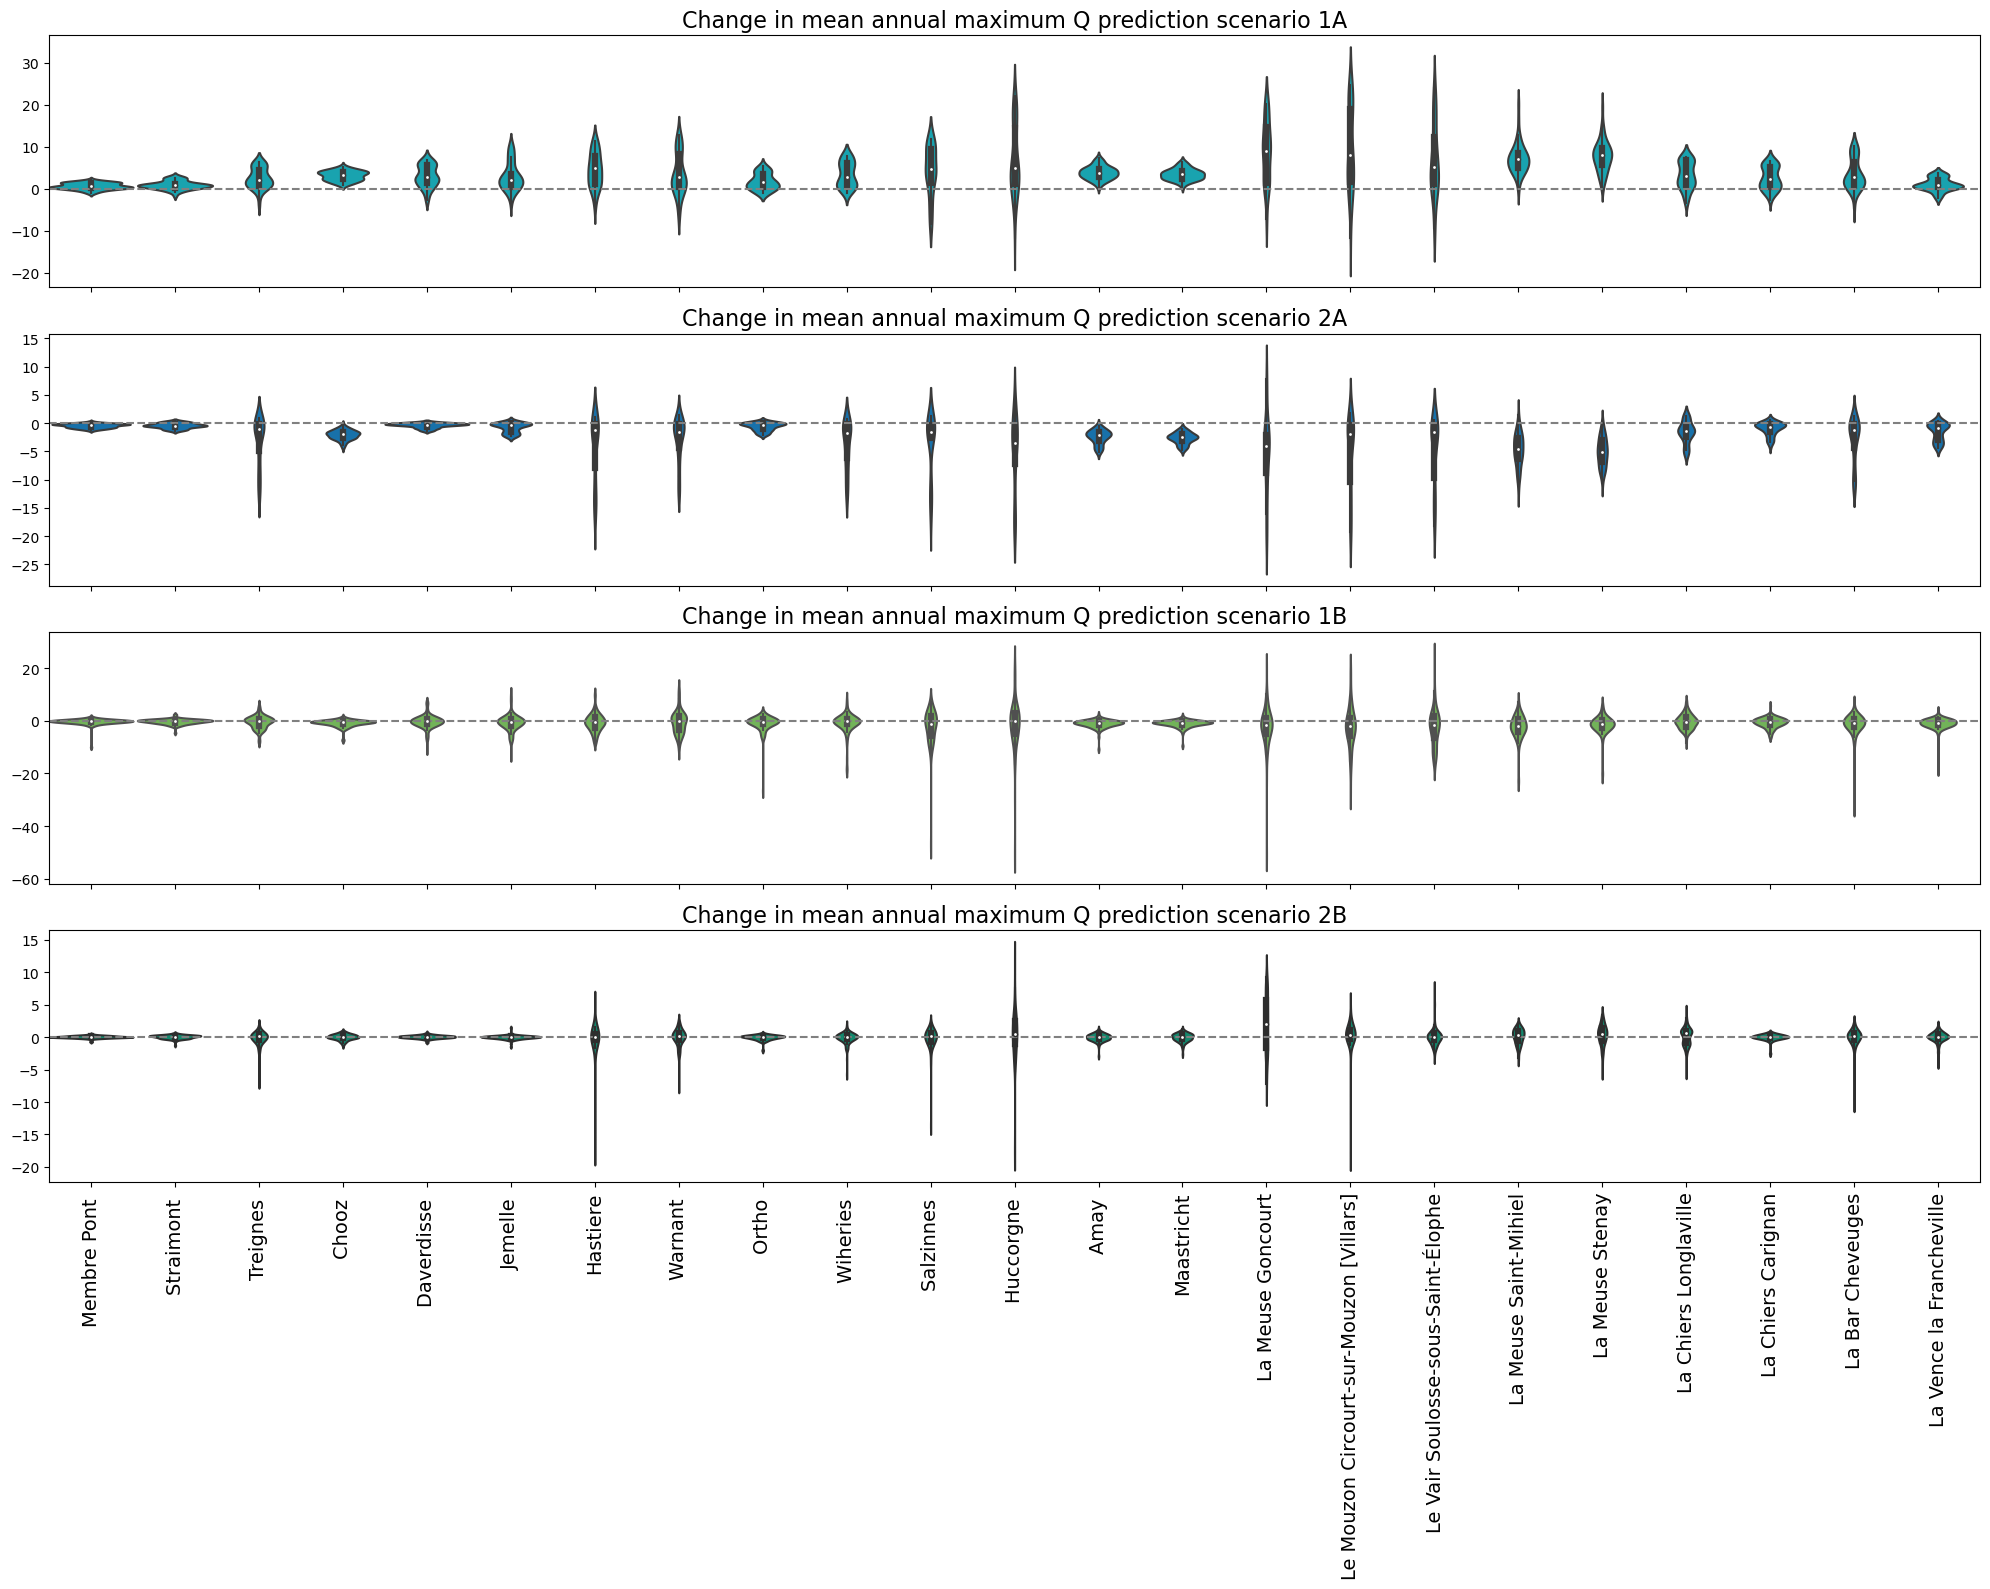

In [40]:
fig, axs = plt.subplots(4, 1, figsize=(20, 16))


for w in range(2):
    runsnrv = runsnrvAB[w]
    Qv = QvAB[w]
    Qmmv = QmmvAB[w]
    EAv = EAvAB[w]
    sc = AB[w]
    colorv = colorAB[w]
    mean_annual_maxv = ["", ""]
    for k in range(2):
        runsnr = runsnrv[k]
        Q = Qv[k]
        mean_annual_max = pd.DataFrame()
        for i in runsnr:
            for u in range(len(meuse_id)):
                col_name = f'run {i} ID {meuse_id[u]}'
                annual_max = Q[col_name].resample('A').max() 
                mean_an_max = np.mean(annual_max)
                mean_annual_max.loc[f'run {i}', f'ID {meuse_id[u]}'] = mean_an_max
                mean_annual_maxv[k] = mean_annual_max

    for k in range(2):
        if w ==0 and k == 0:
            m = 0
        elif w == 0 and k == 1:
            m = 1        
        elif w == 1 and k ==0:
            m = 2
        elif w == 1 and k ==1:
            m = 3
        color = colorv[k]
        runsnr = runsnrv[k]
        mean_annual_max = mean_annual_maxv[k]
        mean_annual_perc = pd.DataFrame()
        mean_annual_diff = pd.DataFrame()
        for i in runsnr:
            for u in range(len(meuse_id)):
                mean_an0 = mean_annual_max.loc[f'run 0', f'ID {meuse_id[u]}']
                if i > 0:
                    mean_an = mean_annual_max.loc[f'run {i}', f'ID {meuse_id[u]}']
                    mean_an_perc = (mean_an - mean_an0) / mean_an0 * 100
                    mean_an_diff =  (mean_an - mean_an0) 
                    mean_annual_perc.loc[f'run {i}', f'ID {meuse_id[u]}'] = mean_an_perc
                    mean_annual_diff.loc[f'run {i}', f'ID {meuse_id[u]}'] = mean_an_diff

        sns.violinplot(data=mean_annual_perc, color=color, width=1, ax=axs[m])
        names = []
        for i in range(len(mean_annual_perc.columns)):
            ID = mean_annual_perc.columns[i]
            value = int(ID.split(" ")[1])
            names.append(WFLOW_inv[str(value)])
        if m == 3:
            axs[m].set_xticklabels(names, rotation=90, fontsize=14)
        else:
            axs[m].set_xticklabels([])
            # axa[m].set_xticks([])
        axs[m].axhline(0, color='grey', linestyle='--')
        # axs[m].set_ylabel('Change in annual max Q [%]', fontsize=16)
        axs[m].set_title(f"Change in mean annual maximum Q prediction scenario {k+1}{sc}", fontsize=16)

plt.tight_layout()
plt.savefig(f'1_Output/{output}/Change_in_max_Q.pdf')
plt.show()

## Min annual Q

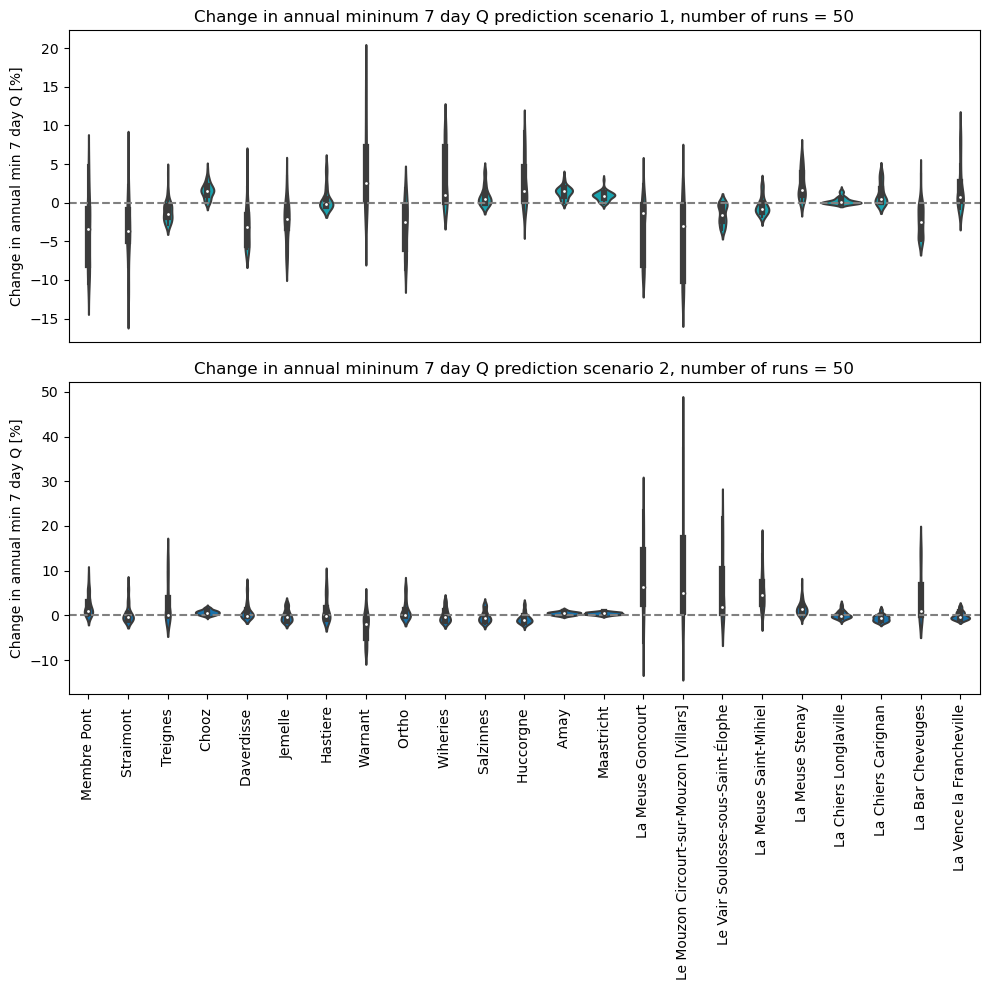

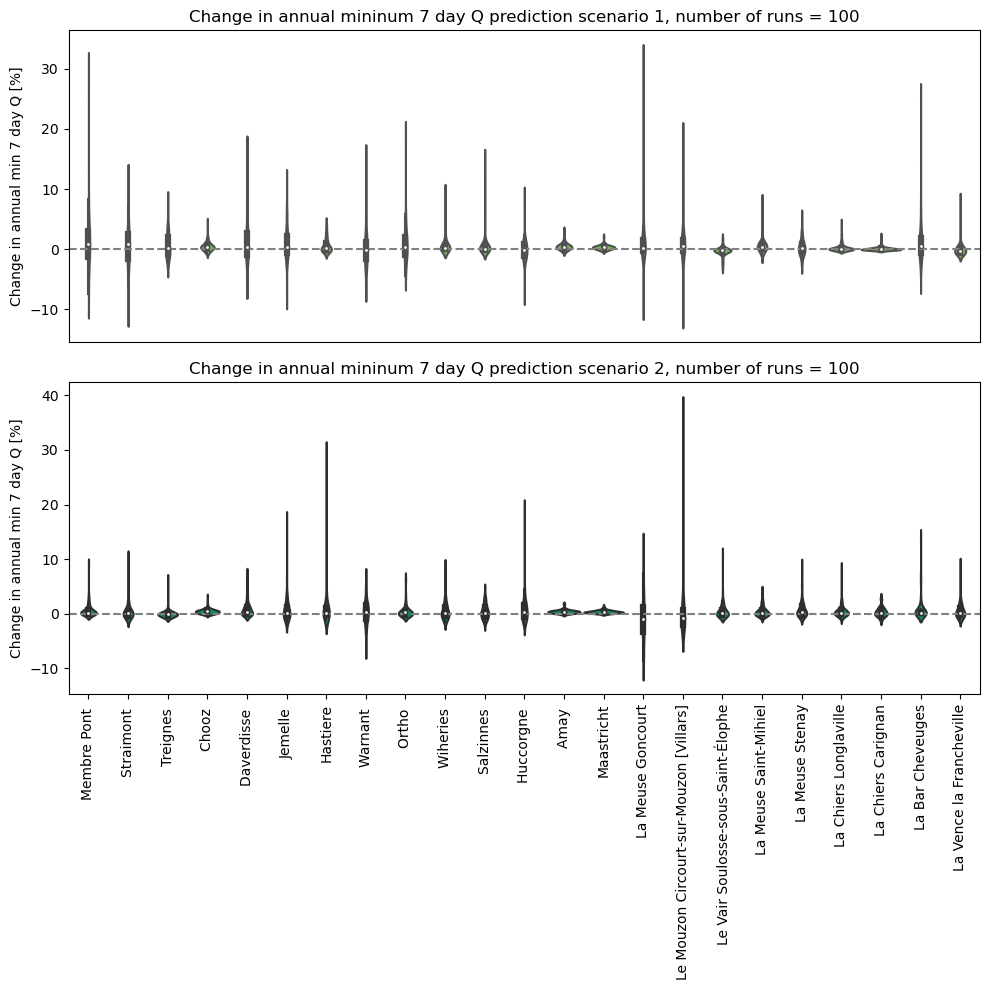

In [42]:
for w in range(2):
    runsnrv = runsnrvAB[w]
    Qv = QvAB[w]
    Qmmv = QmmvAB[w]
    EAv = EAvAB[w]
    sc = AB[w]
    colorv = colorAB[w]


    avg_lowflowv = ["", ""]

    for k in range(2):
        runsnr = runsnrv[k]
        Q = Qv[k]
        avg_lowflow = pd.DataFrame()
        for u in range(len(meuse_id)):   
            for i in runsnr:
                col_name = f'run {i} ID {meuse_id[u]}'
                rolling_min = Q[col_name].rolling(window=7).mean().resample('Y').min() 
                annual_min_avg = rolling_min.mean()
                avg_lowflow.loc[f'run {i}', f'ID {meuse_id[u]}'] = annual_min_avg
        avg_lowflowv[k] = avg_lowflow          

    fig, axs = plt.subplots(2, 1, figsize=(10, 10))


    for k in range(2):
        color = colorv[k]
        runsnr = runsnrv[k]
        avg_lowflow = avg_lowflowv[k]
        mean_annual_perc = pd.DataFrame()
        mean_annual_diff = pd.DataFrame()
        for i in runsnr:
            for u in range(len(meuse_id)):
                mean_an0 = avg_lowflow.loc[f'run 0', f'ID {meuse_id[u]}']
                if i > 0:
                    mean_an = avg_lowflow.loc[f'run {i}', f'ID {meuse_id[u]}']
                    mean_an_perc = (mean_an - mean_an0) / mean_an0 * 100
                    mean_an_diff =  (mean_an - mean_an0) 
                    mean_annual_perc.loc[f'run {i}', f'ID {meuse_id[u]}'] = mean_an_perc
                    mean_annual_diff.loc[f'run {i}', f'ID {meuse_id[u]}'] = mean_an_diff

        sns.violinplot(data=mean_annual_perc, color=color, width=1, ax=axs[k])            


        names = []
        for i in range(len(mean_annual_perc.columns)):
            ID = mean_annual_perc.columns[i]
            value = int(ID.split(" ")[1])
            names.append(WFLOW_inv[str(value)])
        if k > 0:
            axs[k].set_xticks(range(len(mean_annual_perc.columns)), names, rotation=90)
        else:
            axs[k].set_xticks([])
        axs[k].axhline(0, color='grey', linestyle='--')
        axs[k].set_ylabel('Change in annual min 7 day Q [%]')
        axs[k].set_title(f"Change in annual mininum 7 day Q prediction scenario {k+1}, number of runs = {len(runsnr)-1}")

    plt.tight_layout()
    plt.savefig(f'1_Output/{output}/Change_in_min_Q_{sc}.png')
    plt.show()

## Min Q - Figure for report

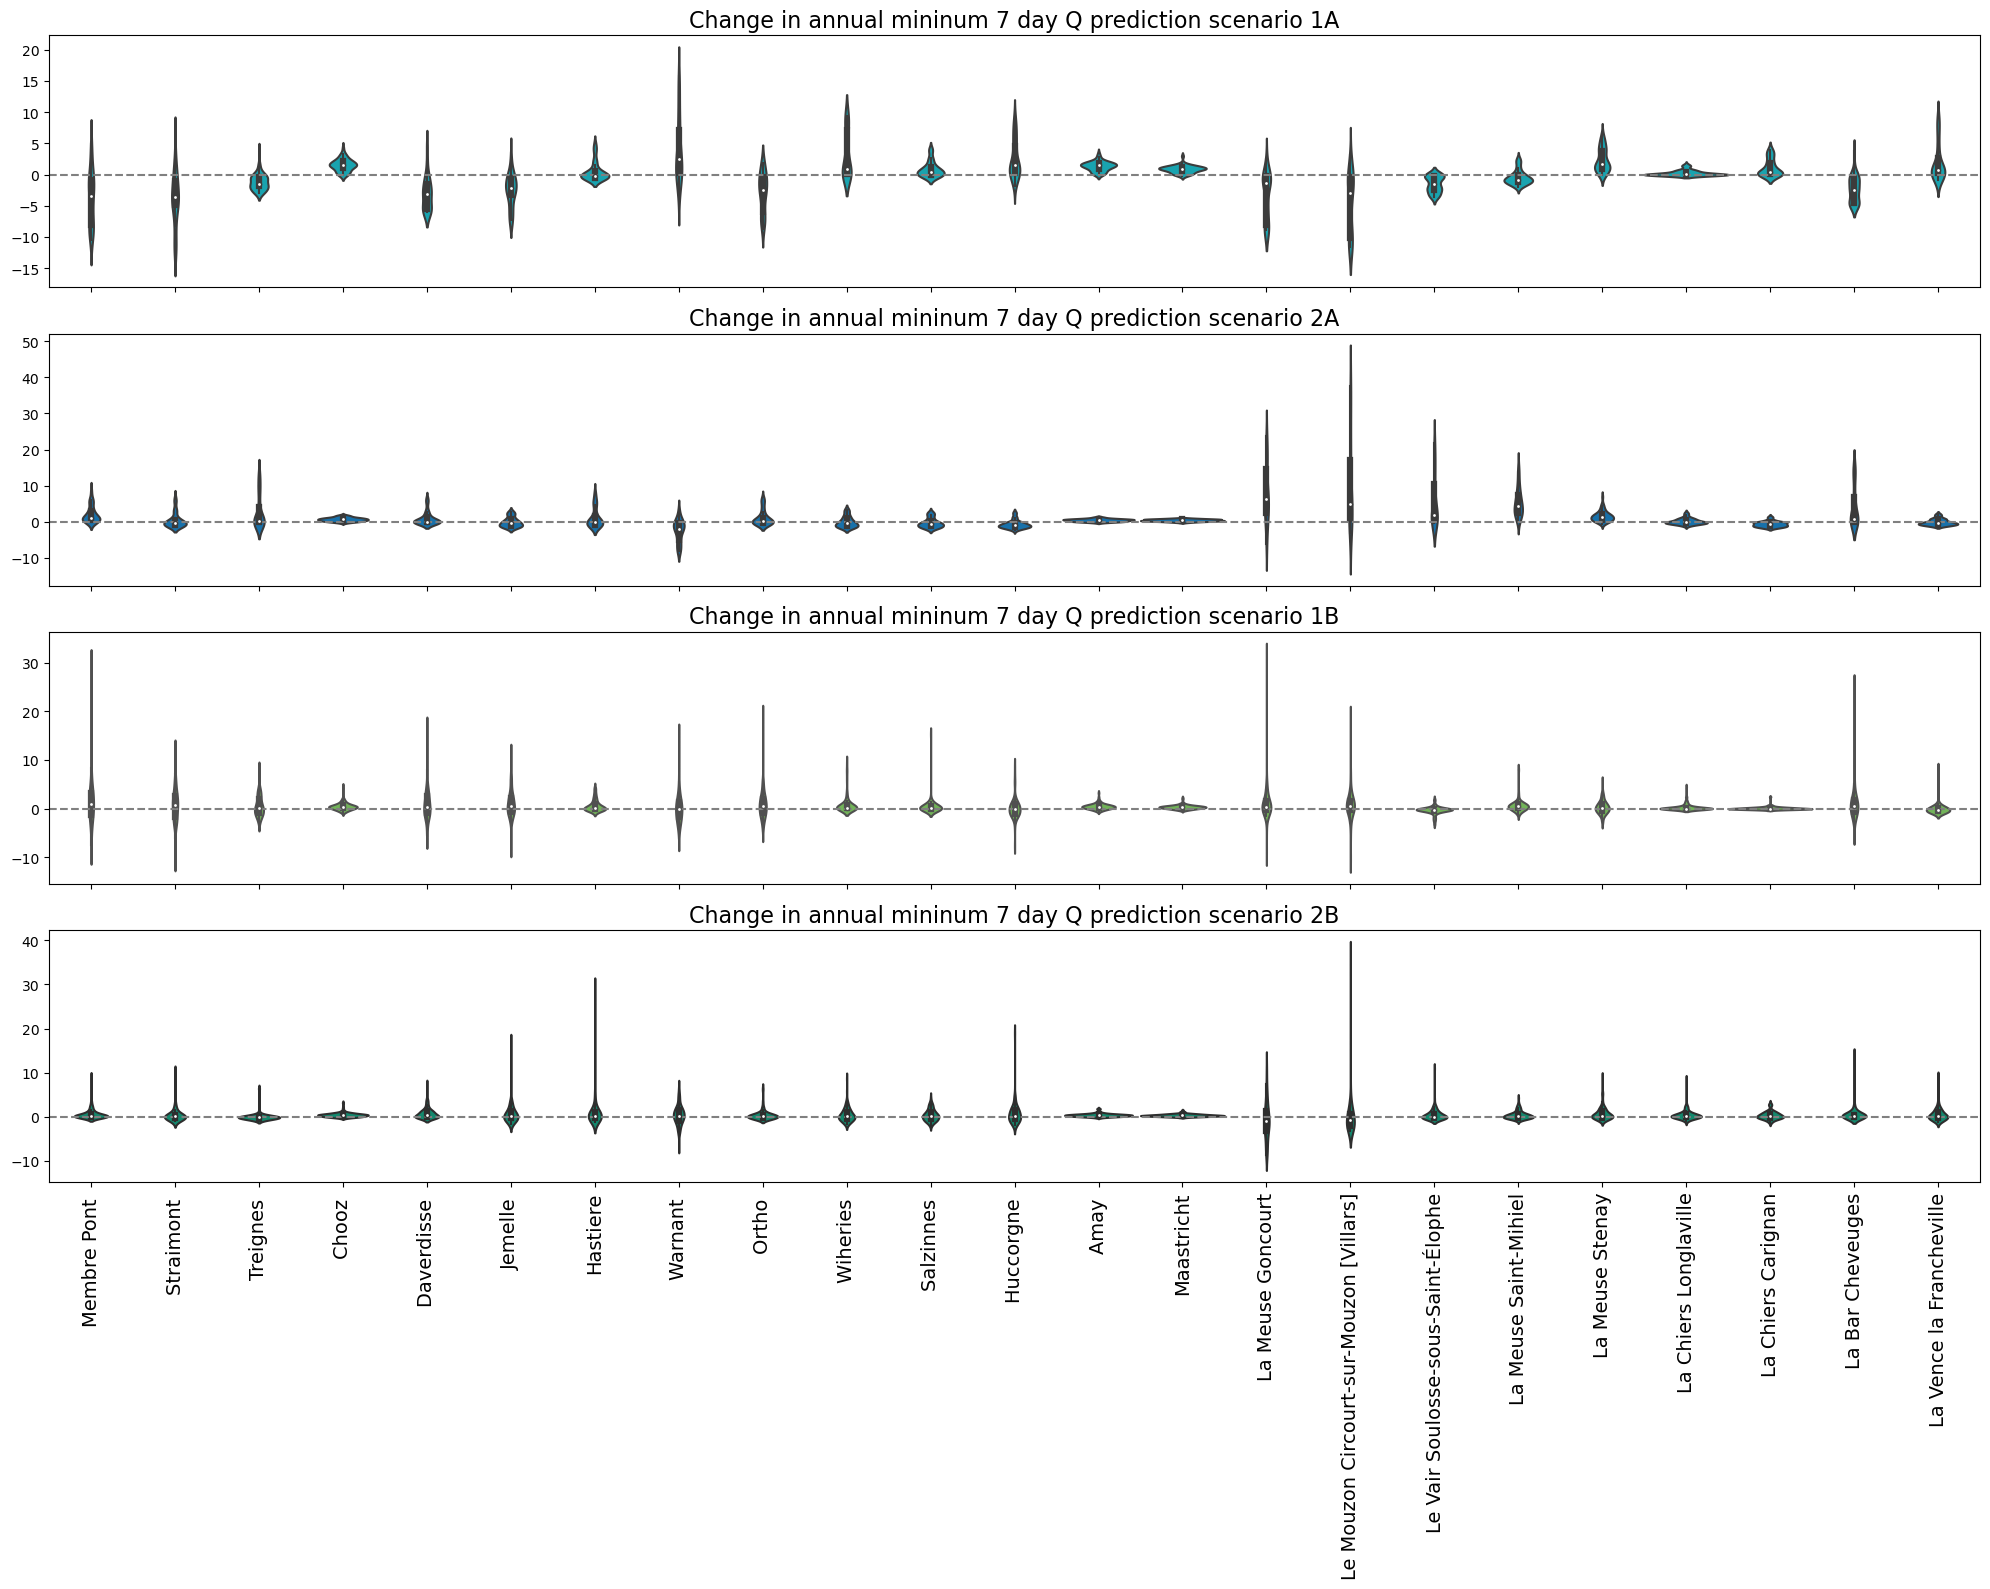

In [43]:
fig, axs = plt.subplots(4, 1, figsize=(20, 16))


for w in range(2):
    runsnrv = runsnrvAB[w]
    Qv = QvAB[w]
    Qmmv = QmmvAB[w]
    EAv = EAvAB[w]
    sc = AB[w]
    colorv = colorAB[w]
    avg_lowflowv = ["", ""]
    for k in range(2):
        runsnr = runsnrv[k]
        Q = Qv[k]
        avg_lowflow = pd.DataFrame()
        for i in runsnr:
            for u in range(len(meuse_id)):
                for i in runsnr:
                    col_name = f'run {i} ID {meuse_id[u]}'
                    rolling_min = Q[col_name].rolling(window=7).mean().resample('Y').min() 
                    annual_min_avg = rolling_min.mean()
                    avg_lowflow.loc[f'run {i}', f'ID {meuse_id[u]}'] = annual_min_avg
            avg_lowflowv[k] = avg_lowflow          
                
                
                
    for k in range(2):
        if w ==0 and k == 0:
            m = 0
        elif w == 0 and k == 1:
            m = 1        
        elif w == 1 and k ==0:
            m = 2
        elif w == 1 and k ==1:
            m = 3
        color = colorv[k]
        runsnr = runsnrv[k]
        avg_lowflow = avg_lowflowv[k]
        mean_annual_perc = pd.DataFrame()
        mean_annual_diff = pd.DataFrame()
        for i in runsnr:
            for u in range(len(meuse_id)):
                mean_an0 = avg_lowflow.loc[f'run 0', f'ID {meuse_id[u]}']
                if i > 0:
                    mean_an = avg_lowflow.loc[f'run {i}', f'ID {meuse_id[u]}']
                    mean_an_perc = (mean_an - mean_an0) / mean_an0 * 100
                    mean_an_diff =  (mean_an - mean_an0) 
                    mean_annual_perc.loc[f'run {i}', f'ID {meuse_id[u]}'] = mean_an_perc
                    mean_annual_diff.loc[f'run {i}', f'ID {meuse_id[u]}'] = mean_an_diff

        sns.violinplot(data=mean_annual_perc, color=color, width=1, ax=axs[m])
        names = []
        for i in range(len(mean_annual_perc.columns)):
            ID = mean_annual_perc.columns[i]
            value = int(ID.split(" ")[1])
            names.append(WFLOW_inv[str(value)])
        if m == 3:
            axs[m].set_xticklabels(names, rotation=90, fontsize=14)
        else:
            axs[m].set_xticklabels([])
        axs[m].axhline(0, color='grey', linestyle='--')
        axs[m].set_title(f"Change in annual mininum 7 day Q prediction scenario {k+1}{sc}", fontsize=16)

plt.tight_layout()
plt.savefig(f'1_Output/{output}/Change_in_min_Q.pdf')
plt.show()

## Calculate the return period

In [44]:
import matplotlib.ticker as ticker

for w in range(2):
    runsnrv = runsnrvAB[w]
    Qv = QvAB[w]
    Qmmv = QmmvAB[w]
    sc = AB[w]
    colorv = colorAB[w]    
    rp_values = []
    Q_RPv= ["",""]
    
    for k in range(2):
        color = colorv[k]
        runsnr = runsnrv[k]
        Q = Qmmv[k]
        
        AMF = Q.resample('A').max() 
        Q_RP = pd.DataFrame()
        delta_AMF = pd.DataFrame()
        delta_AMF_perc = pd.DataFrame()
        for u in range(len(meuse_id)):   
            for i in runsnr:
                col_name = f'run {i} ID {meuse_id[u]}'
                annual_max = AMF[col_name]
                rank = annual_max.rank(ascending=False, method='first') 
                n = len(annual_max)  
                po = (rank+1)/(n+1)  
                rp = 1/po                      
                for n in range(len(rp)):
                    max_n = annual_max[n]
                    rp_n = rp[n] 
                    Q_RP.loc[f'{rp_n}', col_name] = max_n

        Q_RPv[k] = Q_RP
        
    for u in range(len(meuse_id)):
        fig, axs = plt.subplots(2, 1, figsize=(14, 10))

        for k in range(2):
            color = colorv[k]
            runsnr = runsnrv[k]
            Q = Qmmv[k]
            Q_RP = Q_RPv[k]
            Q_RP = Q_RP.sort_index()
            RP_index = Q_RP.index.astype(float)
            # ax2 = axs[k].twinx()
            for i in runsnr:
                if i>0:
                    for q in range(len(Q_RP)):
                        rp_index = Q_RP.index[q]
                        run = Q_RP.loc[rp_index, f'run {i} ID {meuse_id[u]}']
                        run_0 = Q_RP.loc[rp_index, f'run 0 ID {meuse_id[u]}']
                        run_diff = (run - run_0)
                        run_perc = (run_diff/run_0)*100
                        delta_AMF.loc[rp_index, f"run {i} ID {meuse_id[u]}"] = run_diff
                        delta_AMF_perc.loc[rp_index, f"run {i} ID {meuse_id[u]}"] = run_perc
                        # ax2.plot(rp_index, run_perc, '-', linewidth = '0', color=plt.cm.viridis_r(i / len(runsnr)))
            
            
            p10_perc = delta_AMF.quantile(0.1, axis=1)
            p25_perc = delta_AMF.quantile(0.25, axis=1)
            p50_perc = delta_AMF.quantile(0.50, axis=1)
            p75_perc = delta_AMF.quantile(0.75, axis=1)
            p90_perc = delta_AMF.quantile(0.9, axis=1)
            
            # p10_perc_2 = delta_AMF_perc.quantile(0.1, axis=1)
            # p90_perc_2 = delta_AMF_perc.quantile(0.9, axis=1)

            delta_AMF["10th_percentile"] = p10_perc
            delta_AMF["25th_percentile"] = p25_perc
            delta_AMF["50th_percentile"] = p50_perc
            delta_AMF["75th_percentile"] = p75_perc
            delta_AMF["90th_percentile"] = p90_perc
            

            # ax2.fill_between(RP_index.values, delta_AMF_perc["10th_percentile"].values, delta_AMF_perc["90th_percentile"].values, color=color, alpha=0.3) 
            axs[k].fill_between(RP_index.values, delta_AMF["10th_percentile"].values, delta_AMF["90th_percentile"].values, color=color, alpha=0.1, label='10th-90th percentiles') 
            axs[k].fill_between(RP_index.values, delta_AMF["25th_percentile"].values, delta_AMF["75th_percentile"].values, color=color, alpha=0.3, label='25th-75th percentiles') 
            axs[k].plot(RP_index.values, p50_perc.values, '-', label=f'Median', linewidth = '1', color='k')             
            axs[k].axhline(0, color='grey', linestyle='--')
            # ax2.axhline(0, color='grey', linestyle='--')
            axs[k].legend()
            axs[k].set_ylabel("Change in AMF [mm/d]")
            axs[k].set_title(f"Change AMF for specific return period, Meuse ID = {meuse_id[u]}, scenario {k+1} {sc}, number of runs = {len(runsnr)-1}")
            axs[k].set_xlabel('Return period [year]')
            
            # Set logarithmic scale with tick locations at 1, 2, and 5
            # ax2.set_xscale('log')
            axs[k].set_xscale('log')
            # ax2.xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=3, subs=[1.0, 2.0, 3.0, 4.0, 5.0]))
            axs[k].xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=3, subs=[1.0, 2.0, 3.0, 4.0, 5.0]))
            axs[k].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
        

        
        plt.tight_layout()
        plt.savefig(f'1_Output/{output}/RP/RP_ID{meuse_id[u]}, scenario {sc}.png')
        plt.close()

## Timing of high flow (Tabel met AMF)

In [59]:
mean_annual_date_summary = pd.DataFrame()
for w in range(2):
    runsnrv = runsnrvAB[w]
    Qv = QvAB[w]
    Qmmv = QmmvAB[w]
    EAv = EAvAB[w]
    sc = AB[w]
    colorv = colorAB[w]
    mean_annual_datev = ["", ""]
    for k in range(2):
        runsnr = runsnrv[k]
        Q = Qv[k]
        max_annual_date = pd.DataFrame()
        for i in runsnr:
            for u in range(len(meuse_id)):
                col_name = f'run {i} ID {meuse_id[u]}'
                Q_id_run = Q[col_name]
                for year in Q_id_run.index.year.unique():
                    year_data = Q_id_run[Q_id_run.index.year == year]
                    # Filter index based on month range from June to May
                    year_data = year_data[(year_data.index.month >= 7) | (year_data.index.year > year)]
                    year_data = year_data[(year_data.index.month <= 6) | (year_data.index.year < year+1)]
                    max_flow = year_data.max()
                    max_flow_date = year_data.idxmax()
                    max_annual_date.loc[year, col_name] = max_flow_date
                            
        loc_data = pd.DataFrame(index=max_annual_date.index)

        for u in range(len(meuse_id)):
            days= []
            ref_data = max_annual_date[f'run 0 ID {meuse_id[u]}']  
            for i in runsnr:
                col_name = f'run {i} ID {meuse_id[u]}'
                if i > 0:
                    run_value = max_annual_date[col_name]
                    diff = run_value - ref_data
                    gemiddelde_diff = diff.mean()
                    days.append(gemiddelde_diff)
                
            seconds = [td.total_seconds() for td in days]
            std_over_runs = np.std(seconds) / 86400  
            gemiddelde_runs = np.mean(seconds) / 86400
            
            mean_annual_date_summary.loc[f'{meuse_id[u]}',f'Δt {sc}{k+1}'] =  gemiddelde_runs
            mean_annual_date_summary.loc[f'{meuse_id[u]}',f'std {sc}{k+1}'] =  std_over_runs

In [61]:
mean_amf_all = mean_annual_date_summary.mean(axis=0)
            
display(mean_amf_all)
mean_amf_all = mean_amf_all.astype(int)


# mean_amf_all[f'Δt A1'] = mean_amf_all[f'Δt A1'].apply(lambda x: f'+{x}' if x > 0 else x)
# mean_amf_all[f'Δt A2'] = mean_amf_all[f'Δt A2'].apply(lambda x: f'+{x}' if x > 0 else x)
# mean_amf_all[f'Δt B1'] = mean_amf_all[f'Δt B1'].apply(lambda x: f'+{x}' if x > 0 else x)
# mean_amf_all[f'Δt B2'] = mean_amf_all[f'Δt B2'].apply(lambda x: f'+{x}' if x > 0 else x)

display(mean_amf_all)

mean_amf_all.to_csv(f'1_Output/{output}/mean_amf_all.csv')

Δt A1     1.072000
std A1    2.119435
Δt A2     1.809913
std A2    2.935408
Δt B1     0.220826
std B1    1.015906
Δt B2    -0.253478
std B2    2.437949
dtype: float64

Δt A1     1
std A1    2
Δt A2     1
std A2    2
Δt B1     0
std B1    1
Δt B2     0
std B2    2
dtype: int32

In [77]:
mean = pd.DataFrame({'Δt AMF': mean_amf_all.filter(like='Δt').values, 
                   'std': mean_amf_all.filter(like='std').values},
                  index=['Scenario A1', 'Scenario A2', 'Scenario B1', 'Scenario B2'])

mean['Δt AMF'] = mean['Δt AMF'].astype(int)

mean[f'Δt AMF'] = mean[f'Δt AMF'].apply(lambda x: f'+{x}' if x > 0 else x)
mean.to_csv(f'1_Output/{output}/MEAN.csv')

display(mean)

,Δt AMF,std
Scenario A1,+1,2
Scenario A2,+1,2
Scenario B1,0,1
Scenario B2,0,2


In [ ]:
mean_annual_date_summary = mean_annual_date_summary.astype(int)
mean_annual_date_summary[f'Δt A1'] = mean_annual_date_summary[f'Δt A1'].apply(lambda x: f'+{x}' if x > 0 else x)
mean_annual_date_summary[f'Δt A2'] = mean_annual_date_summary[f'Δt A2'].apply(lambda x: f'+{x}' if x > 0 else x)
mean_annual_date_summary[f'Δt B1'] = mean_annual_date_summary[f'Δt B1'].apply(lambda x: f'+{x}' if x > 0 else x)
mean_annual_date_summary[f'Δt B2'] = mean_annual_date_summary[f'Δt B2'].apply(lambda x: f'+{x}' if x > 0 else x)

display(mean_annual_date_summary)
mean_annual_date_summary.to_csv(f'1_Output/{output}/mean_annual_date_summary.csv')